In [1]:
cd C:\Users\Lenovo\Documents\data

C:\Users\Lenovo\Documents\data


In [2]:
cd ..

C:\Users\Lenovo\Documents


In [3]:
import torch
import os
import scipy.io as sio
from sklearn.model_selection import train_test_split
import numpy as np

# load data
data_dir_root = os.path.join('./data', 'ThingsEEG-Text')
sbj = 'sub-10'
image_model = 'pytorch/cornet_s'
text_model = 'CLIPText'
roi = '17channels'
brain_dir = os.path.join(data_dir_root, 'brain_feature', roi, sbj)
image_dir_seen = os.path.join(data_dir_root, 'visual_feature/ThingsTrain', image_model, sbj)
image_dir_unseen = os.path.join(data_dir_root, 'visual_feature/ThingsTest', image_model, sbj)
text_dir_seen = os.path.join(data_dir_root, 'textual_feature/ThingsTrain/text', text_model, sbj)
text_dir_unseen = os.path.join(data_dir_root, 'textual_feature/ThingsTest/text', text_model, sbj)

brain_seen = sio.loadmat(os.path.join(brain_dir, 'eeg_train_data_within.mat'))['data'].astype('double') * 2.0
brain_seen = brain_seen[:,:,27:60] # 70ms-400ms
brain_seen = np.reshape(brain_seen, (brain_seen.shape[0], -1))
image_seen = sio.loadmat(os.path.join(image_dir_seen, 'feat_pca_train.mat'))['data'].astype('double')*50.0
text_seen = sio.loadmat(os.path.join(text_dir_seen, 'text_feat_train.mat'))['data'].astype('double')*2.0
label_seen = sio.loadmat(os.path.join(brain_dir, 'eeg_train_data_within.mat'))['class_idx'].T.astype('int')
image_seen = image_seen[:,0:100]

brain_unseen = sio.loadmat(os.path.join(brain_dir, 'eeg_test_data.mat'))['data'].astype('double')*2.0
brain_unseen = brain_unseen[:, :, 27:60]
brain_unseen = np.reshape(brain_unseen, (brain_unseen.shape[0], -1))
image_unseen = sio.loadmat(os.path.join(image_dir_unseen, 'feat_pca_test.mat'))['data'].astype('double')*50.0
text_unseen = sio.loadmat(os.path.join(text_dir_unseen, 'text_feat_test.mat'))['data'].astype('double')*2.0
label_unseen = sio.loadmat(os.path.join(brain_dir, 'eeg_test_data.mat'))['class_idx'].T.astype('int')
image_unseen = image_unseen[:, 0:100]

brain_seen = torch.from_numpy(brain_seen)
brain_unseen = torch.from_numpy(brain_unseen)
image_seen = torch.from_numpy(image_seen)
image_unseen = torch.from_numpy(image_unseen)
text_seen = torch.from_numpy(text_seen)
text_unseen = torch.from_numpy(text_unseen)
label_seen = torch.from_numpy(label_seen)
label_unseen = torch.from_numpy(label_unseen)

print('seen_brain_samples=', brain_seen.shape[0], ', seen_brain_features=', brain_seen.shape[1])
print('seen_image_samples=', image_seen.shape[0], ', seen_image_features=', image_seen.shape[1])
print('seen_text_samples=', text_seen.shape[0], ', seen_text_features=', text_seen.shape[1])
print('seen_label=', label_seen.shape)
print('unseen_brain_samples=', brain_unseen.shape[0], ', unseen_brain_features=', brain_unseen.shape[1])
print('unseen_image_samples=', image_unseen.shape[0], ', unseen_image_features=', image_unseen.shape[1])
print('unseen_text_samples=', text_unseen.shape[0], ', unseen_text_features=', text_unseen.shape[1])
print('unseen_label=', label_unseen.shape)

seen_brain_samples= 16540 , seen_brain_features= 561
seen_image_samples= 16540 , seen_image_features= 100
seen_text_samples= 16540 , seen_text_features= 512
seen_label= torch.Size([16540, 1])
unseen_brain_samples= 16000 , unseen_brain_features= 561
unseen_image_samples= 16000 , unseen_image_features= 100
unseen_text_samples= 16000 , unseen_text_features= 512
unseen_label= torch.Size([16000, 1])


In [4]:
label_seen 

tensor([[   1],
        [   1],
        [   1],
        ...,
        [1654],
        [1654],
        [1654]], dtype=torch.int32)

In [5]:
#Consistency Across Modalities: Each data type (brain, image, text) has the same number of samples within a group . 
#This suggests a multimodal dataset, where each sample includes brain, image, and text representations.

#Feature Dimensionality:

#brain_seen and brain_unseen have a high dimensionality (561 features).
#image_seen and image_unseen have a relatively lower dimensionality (100 features).
#text_seen and text_unseen are moderately high-dimensional (512 features).

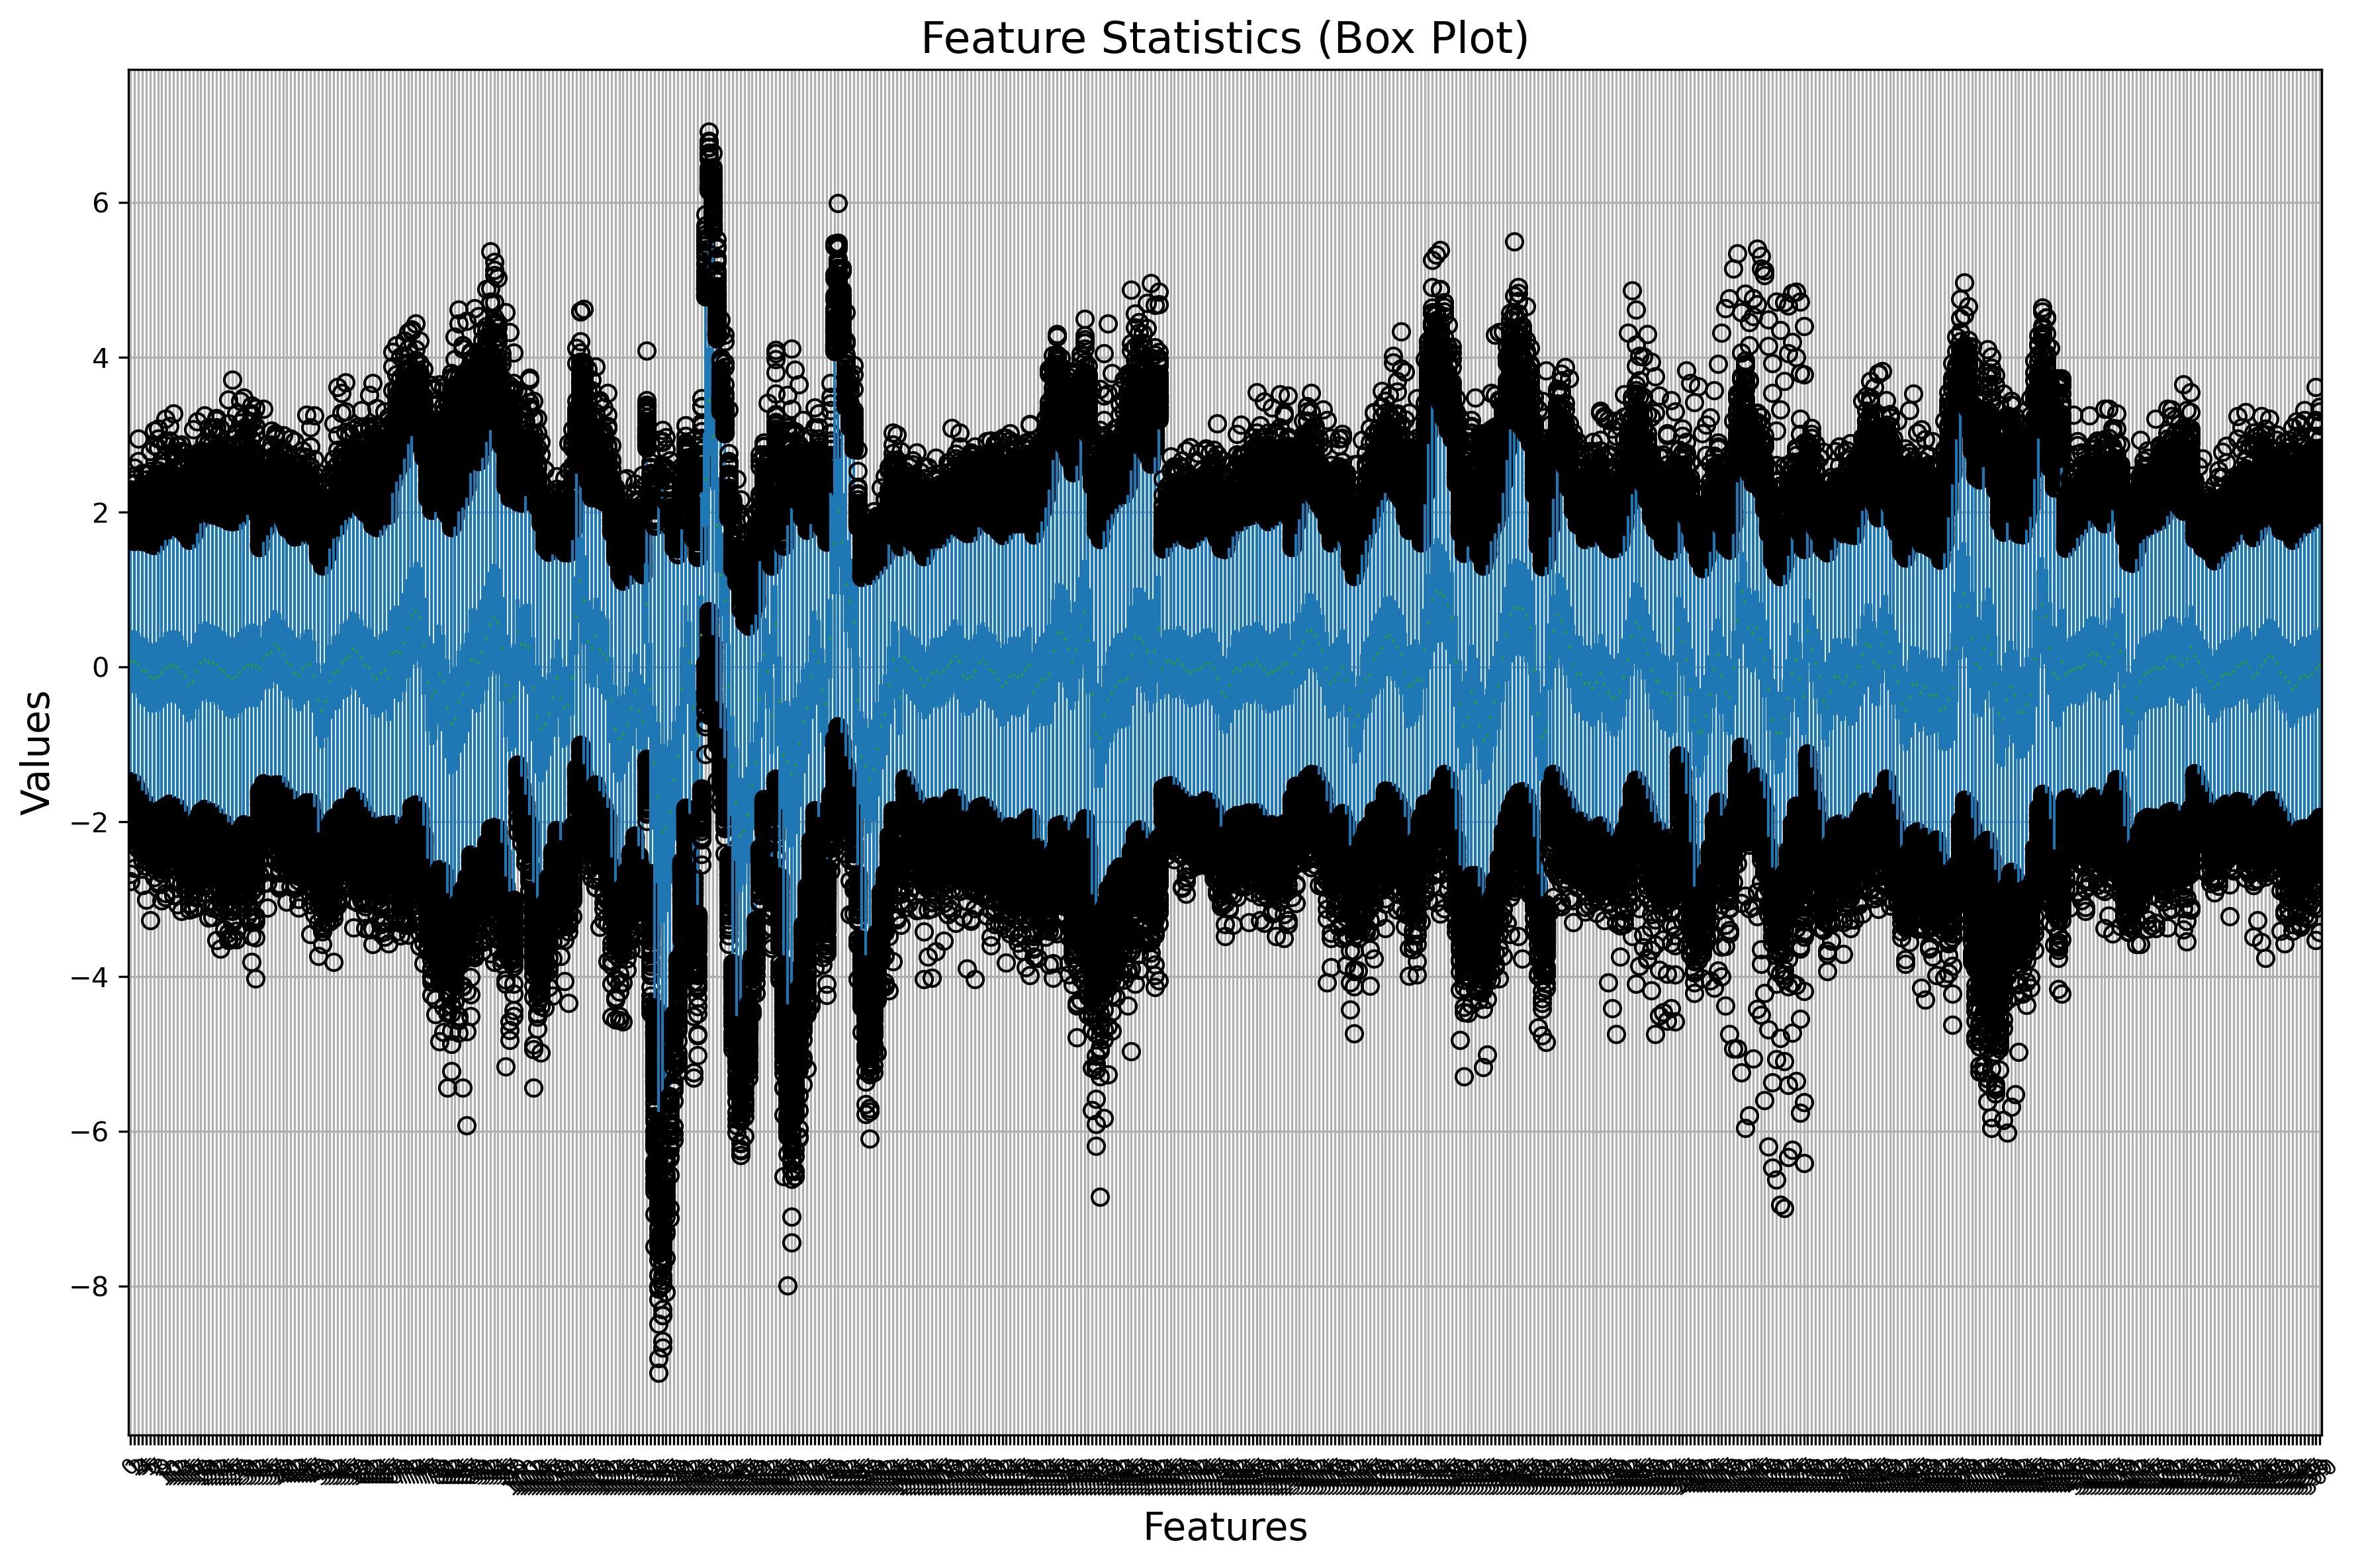

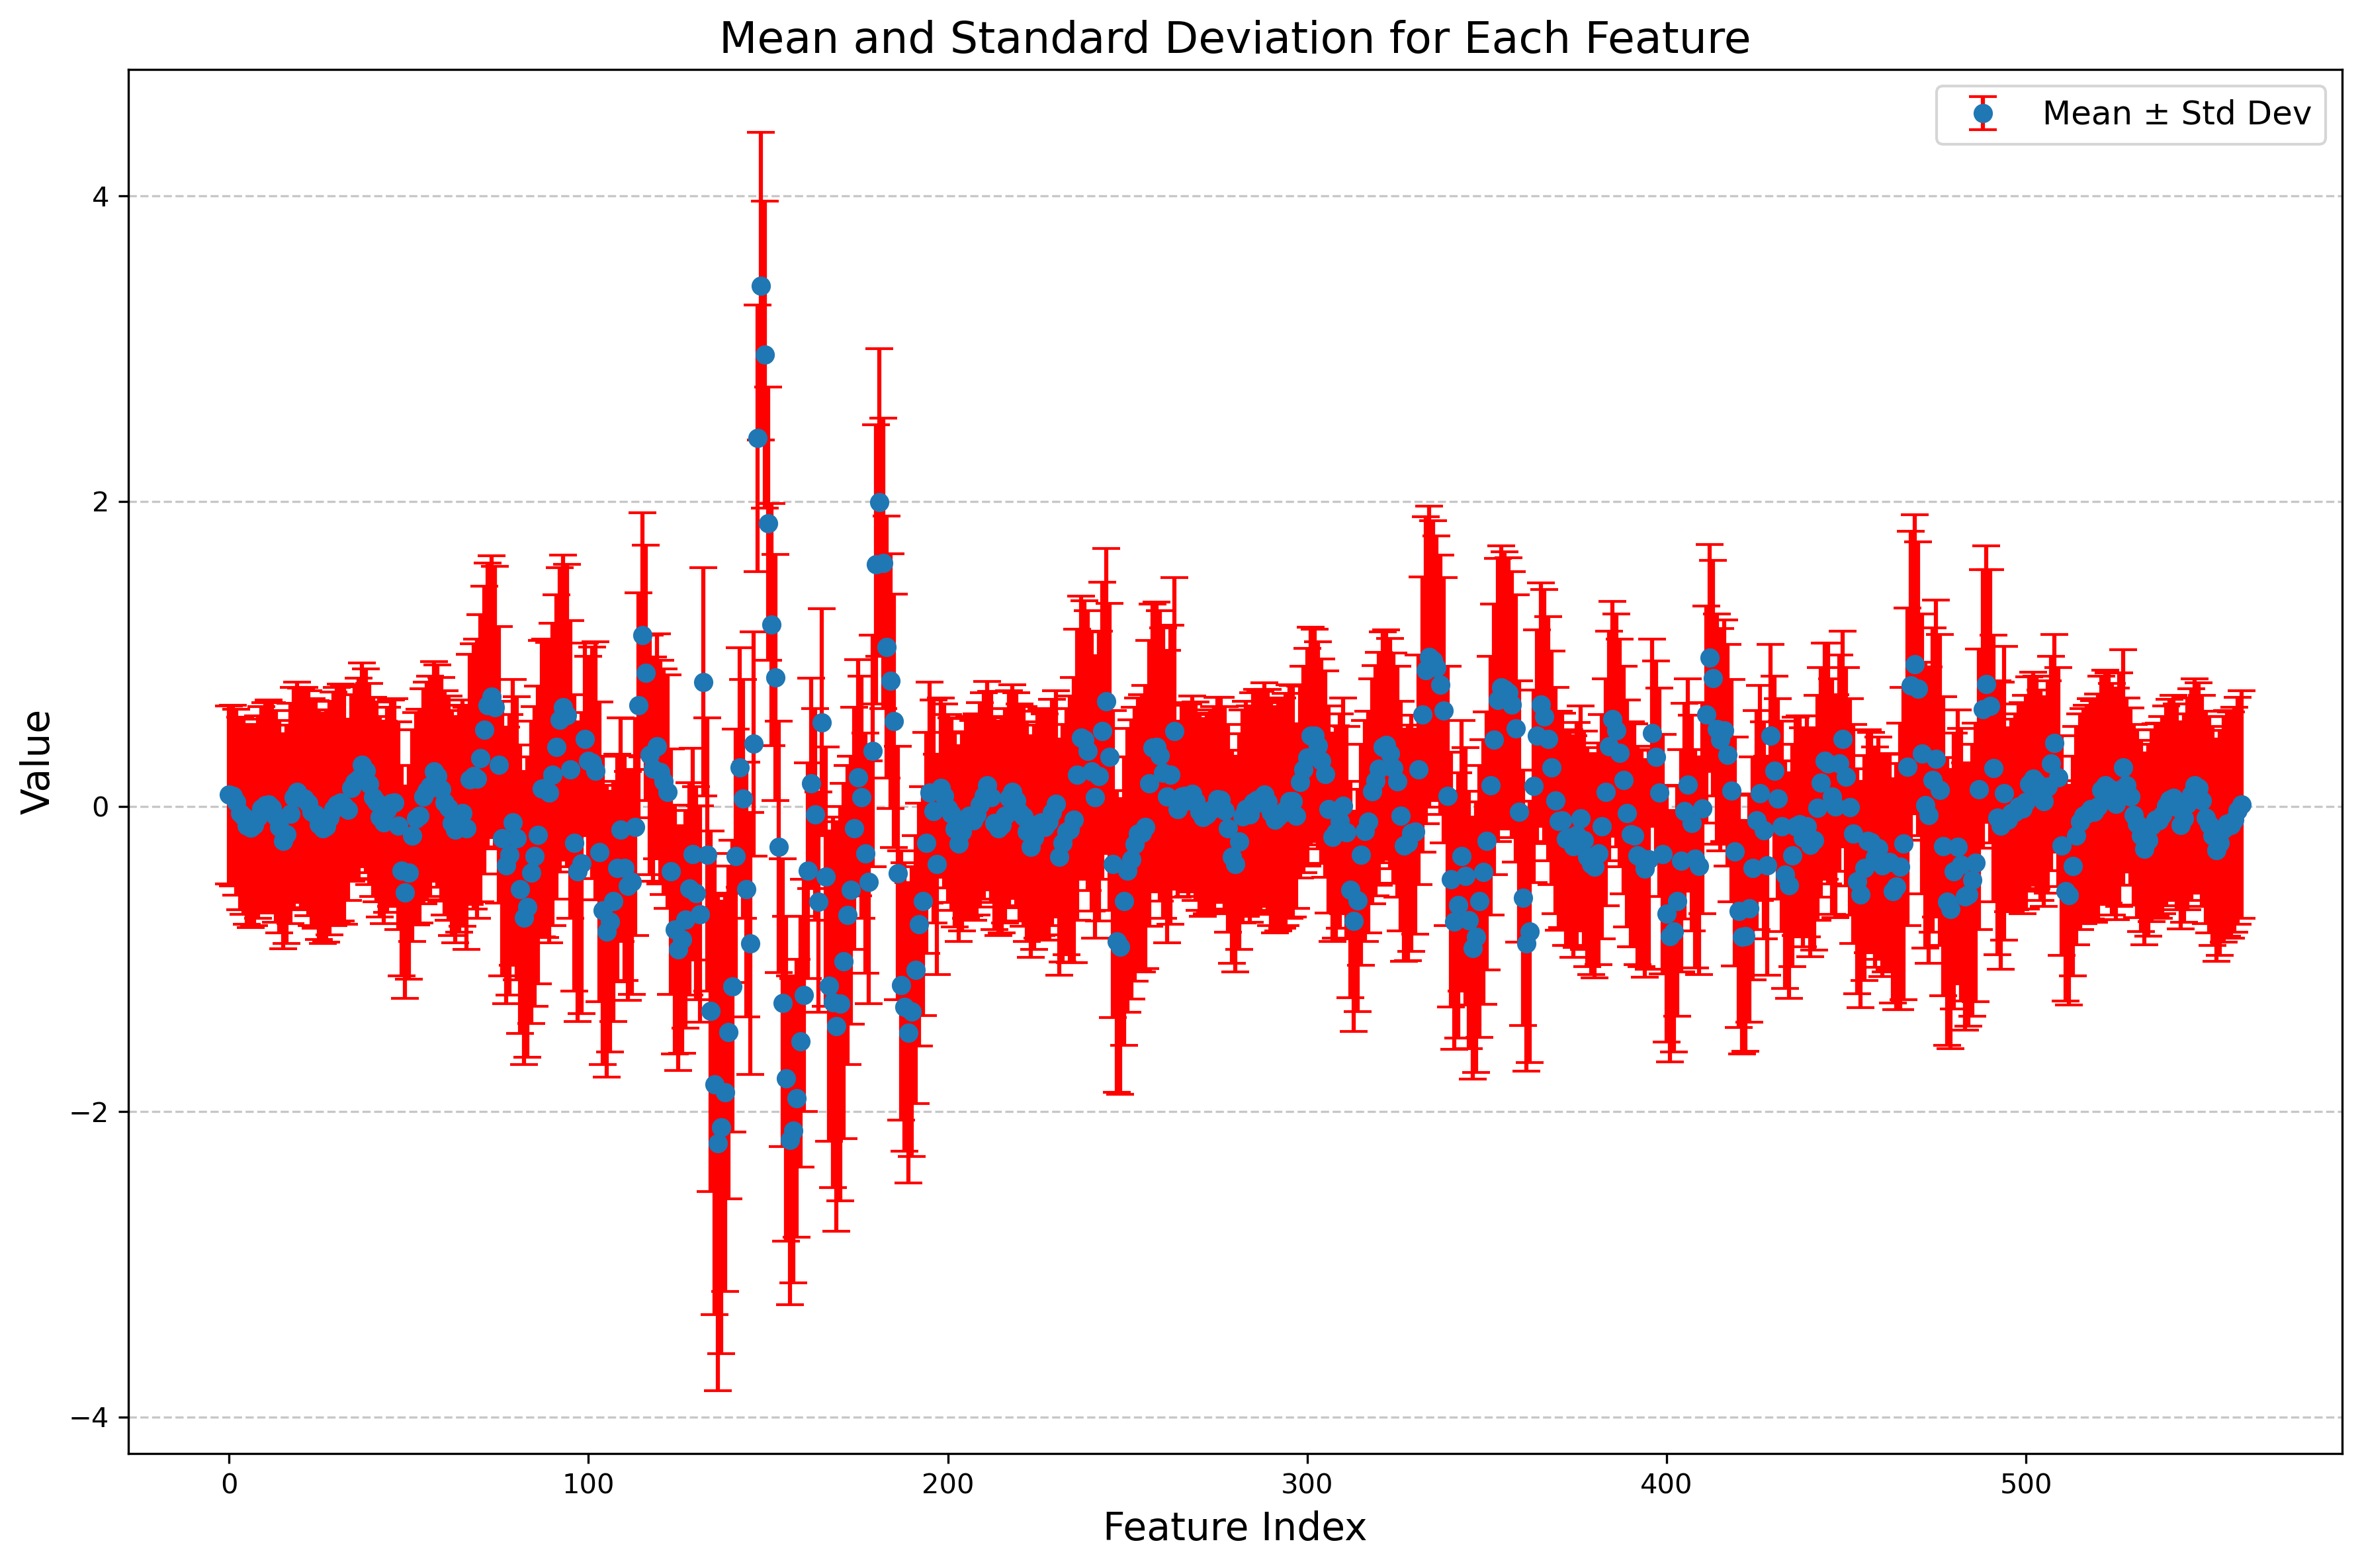

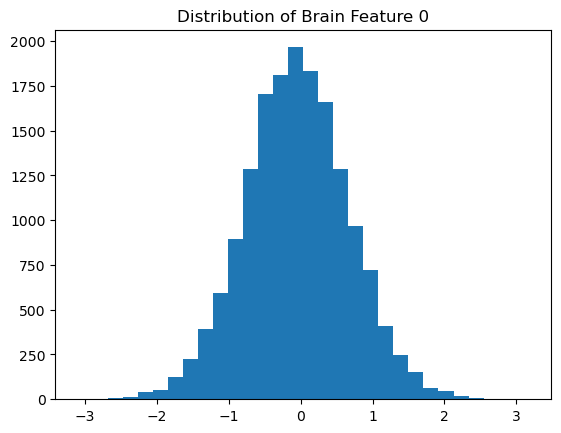

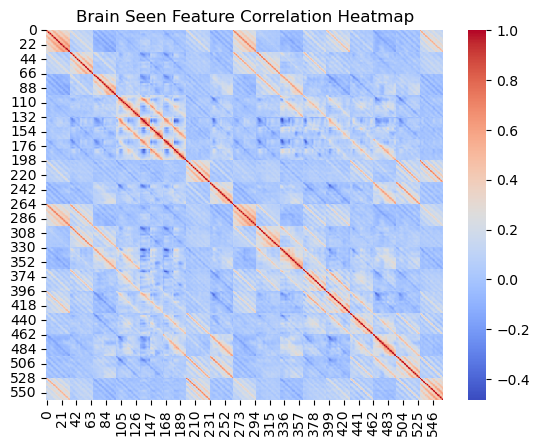

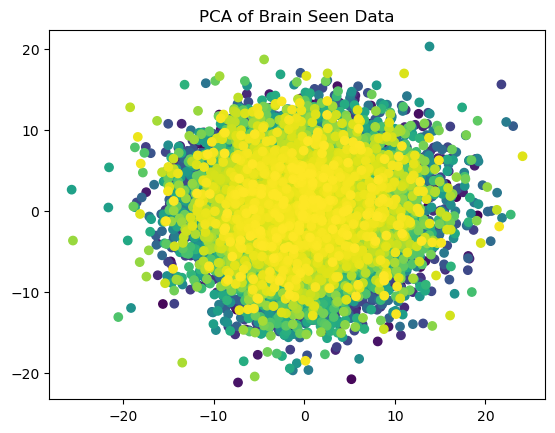

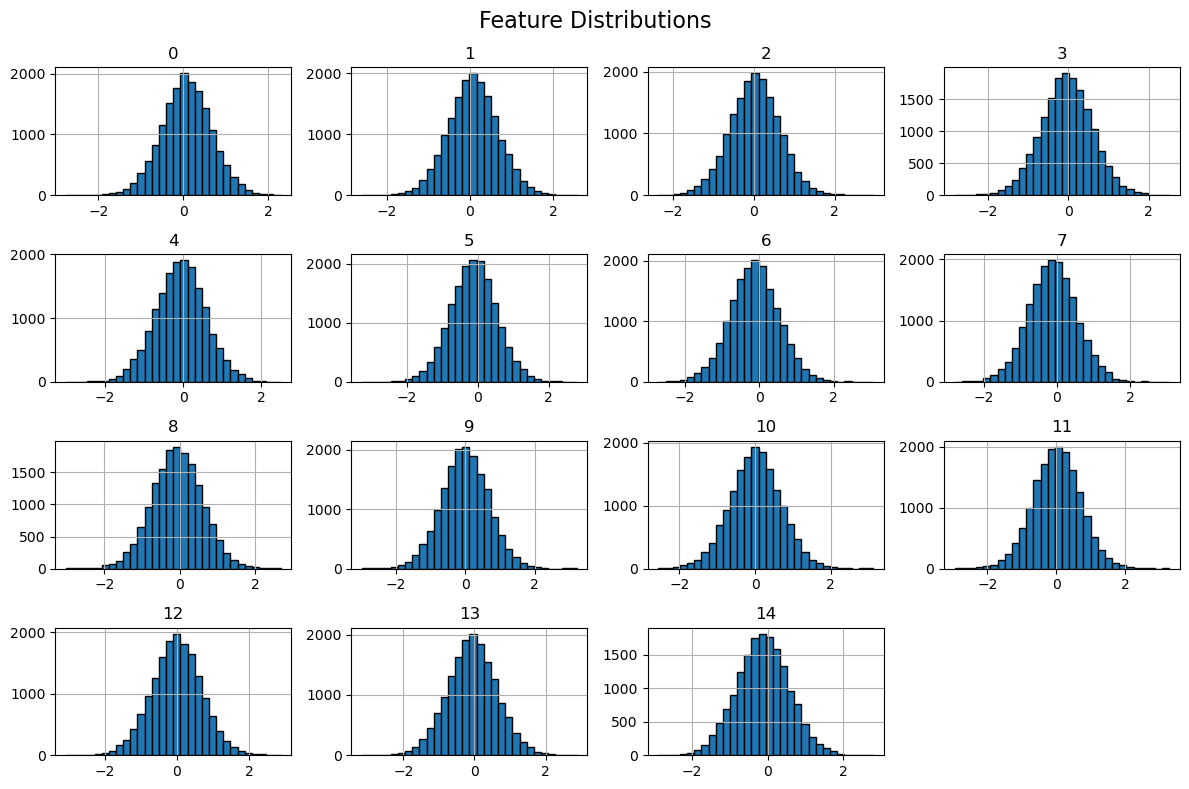

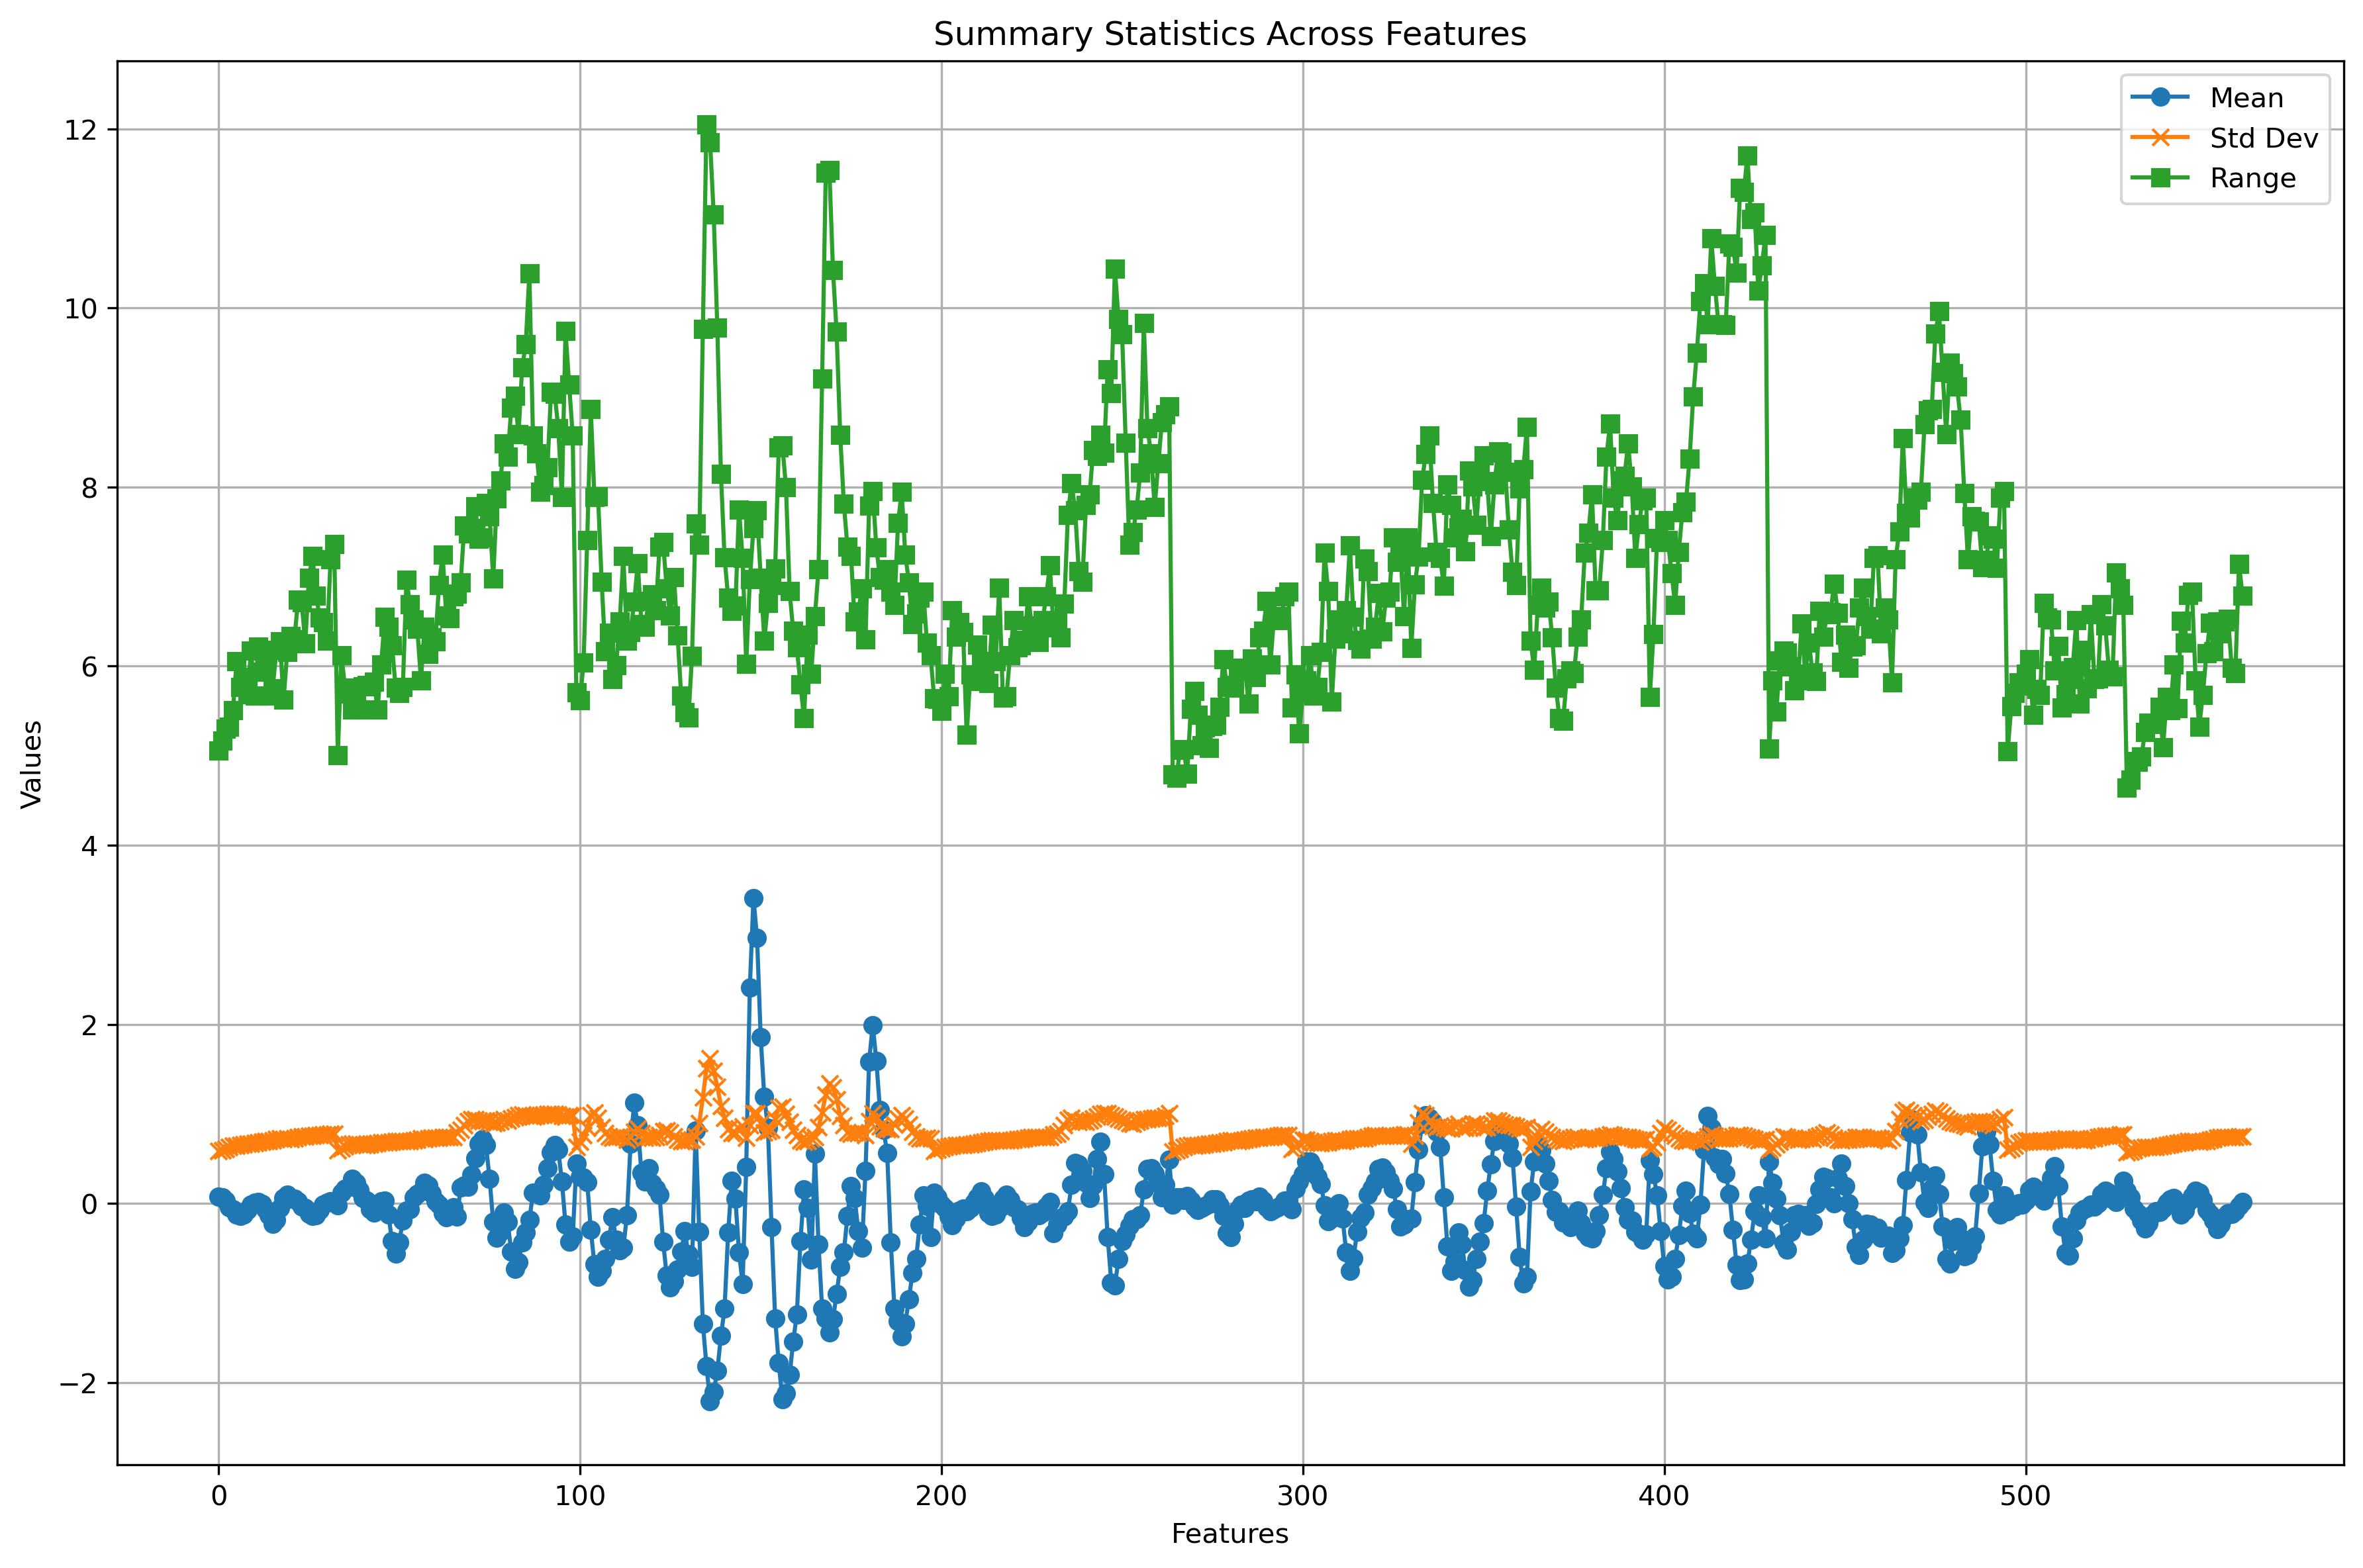

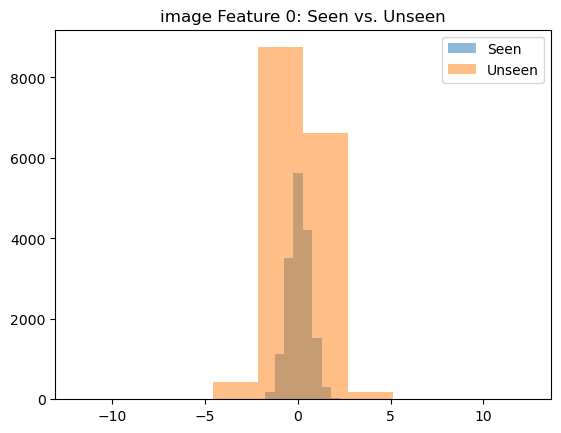

In [6]:
#Analysing brain seen dataset 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Convert tensors to Pandas DataFrames
brain_seen_df = pd.DataFrame(brain_seen.numpy())  

# Basic statistics for Brain data
#print("Brain Data Statistics:")
#print(brain_seen_df.describe())  # Summary for all features

#Box plotfor summary statistic
# Convert tensor to Pandas DataFrame for better handling
brain_seen_df = pd.DataFrame(brain_seen.numpy())

# Create a box plot
# Enable interactive plots
#matplotlib notebook
plt.figure(figsize=(12, 8), dpi=300)
brain_seen_df.boxplot()
plt.title('Feature Statistics (Box Plot)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=8)  # Rotate feature labels for clarity
plt.tight_layout()
plt.show()


#Error bar chart for mean and std 
# Compute mean and standard deviation
means = brain_seen.mean(dim=0).numpy()
stds = brain_seen.std(dim=0).numpy()
features = np.arange(len(means))  # Feature indices

# Create error bar chart
plt.figure(figsize=(12, 8), dpi=300)
plt.errorbar(features, means, yerr=stds, fmt='o', ecolor='red', capsize=5, linestyle='None', label='Mean ± Std Dev')
plt.title('Mean and Standard Deviation for Each Feature', fontsize=16)
plt.xlabel('Feature Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Distribution
plt.hist(brain_seen[:, 17].numpy(), bins=30)  # Feature 0
plt.title('Distribution of Brain Feature 0')
plt.show()

#Heatmap Correlation
brain_seen_corr = np.corrcoef(brain_seen.numpy(), rowvar=False)
sns.heatmap(brain_seen_corr, cmap='coolwarm')
plt.title('Brain Seen Feature Correlation Heatmap')
plt.show()

pca = PCA(n_components=0.95)
brain_seen_reduced = pca.fit_transform(brain_seen.numpy())
plt.scatter(brain_seen_reduced[:, 0], brain_seen_reduced[:, 1], c=label_seen.numpy().squeeze())
plt.title('PCA of Brain Seen Data')
plt.show()

# Plot histograms for a few features (e.g., first 10 features)
brain_seen_df.iloc[:, :15].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

# Compute statistics for visualization
feature_means = brain_seen_df.mean()
feature_stds = brain_seen_df.std()
feature_ranges = brain_seen_df.max() - brain_seen_df.min()

# Plot statistics
plt.figure(figsize=(12, 8), dpi=300)
plt.plot(feature_means, label='Mean', marker='o')
plt.plot(feature_stds, label='Std Dev', marker='x')
plt.plot(feature_ranges, label='Range', marker='s')
plt.title('Summary Statistics Across Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#Compare the feature distribution of seen and unseen data 
plt.hist(brain_seen[:, 0].numpy(), alpha=0.5, label='Seen')
plt.hist(brain_unseen[:, 0].numpy(), alpha=0.5, label='Unseen')
plt.legend()
plt.title('image Feature 0: Seen vs. Unseen')
plt.show()

#Check if any features have a constant value (no variance across sample)


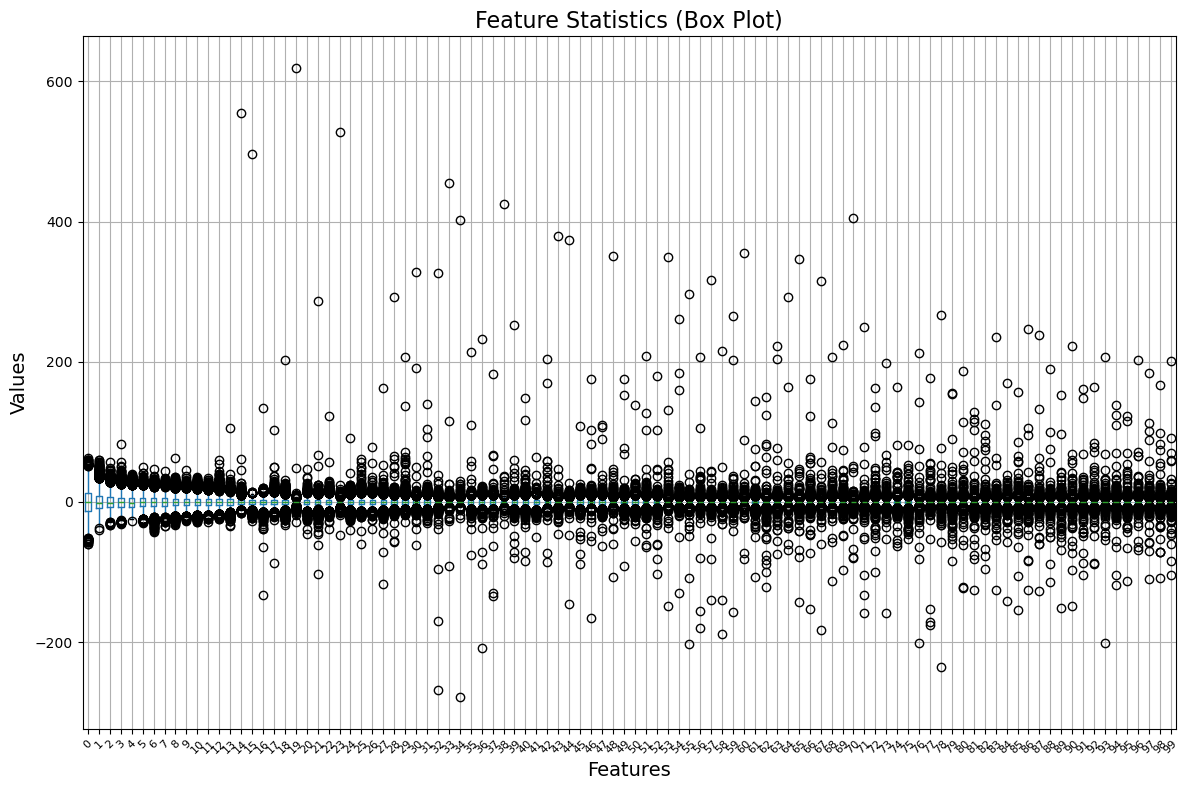

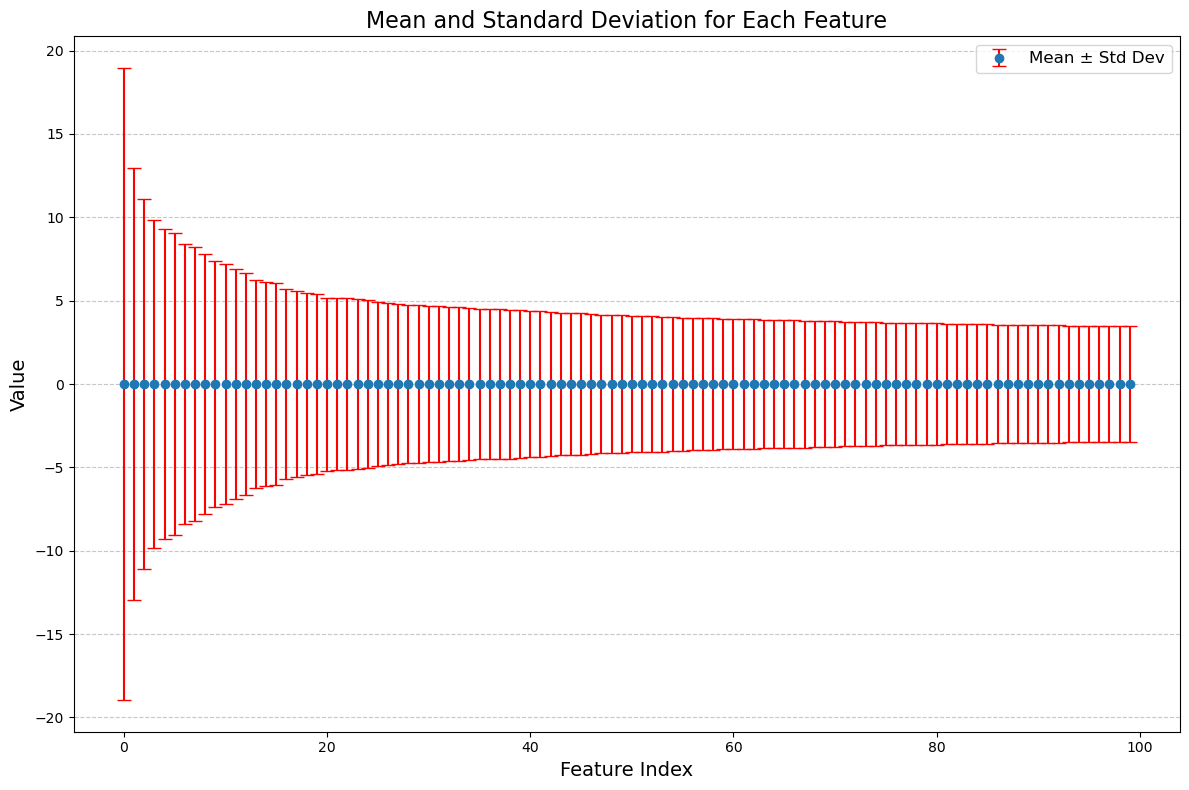

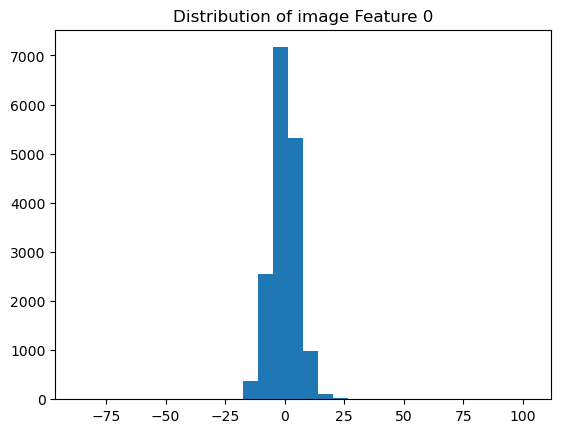

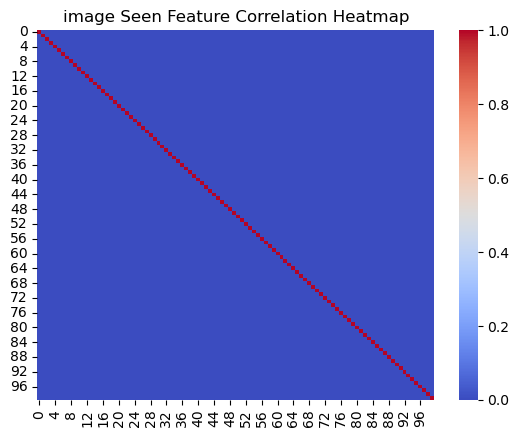

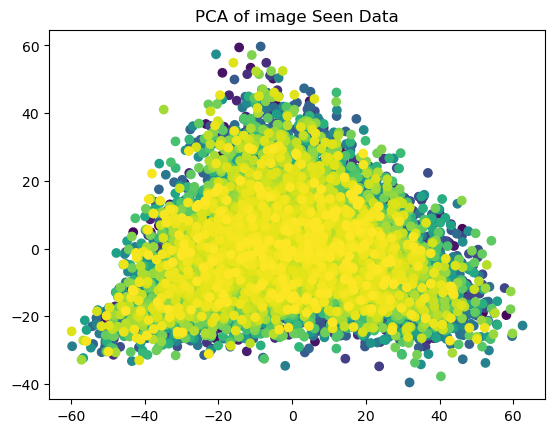

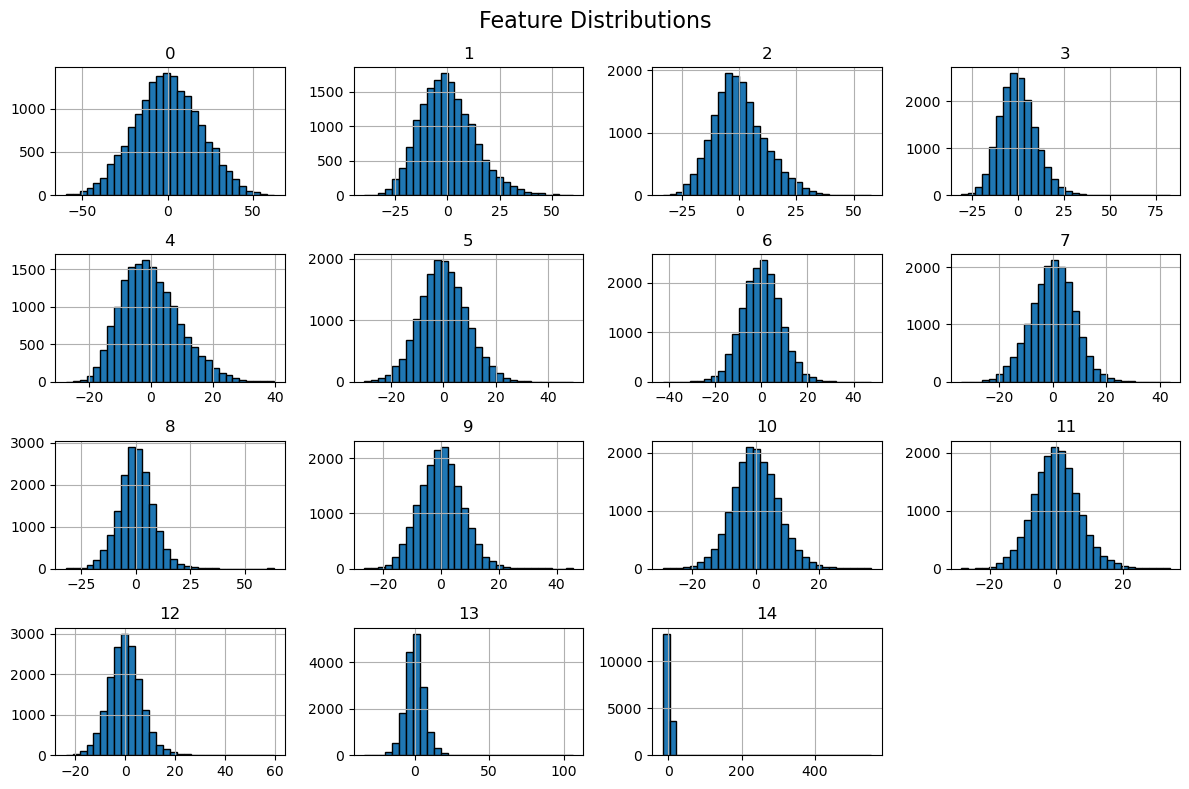

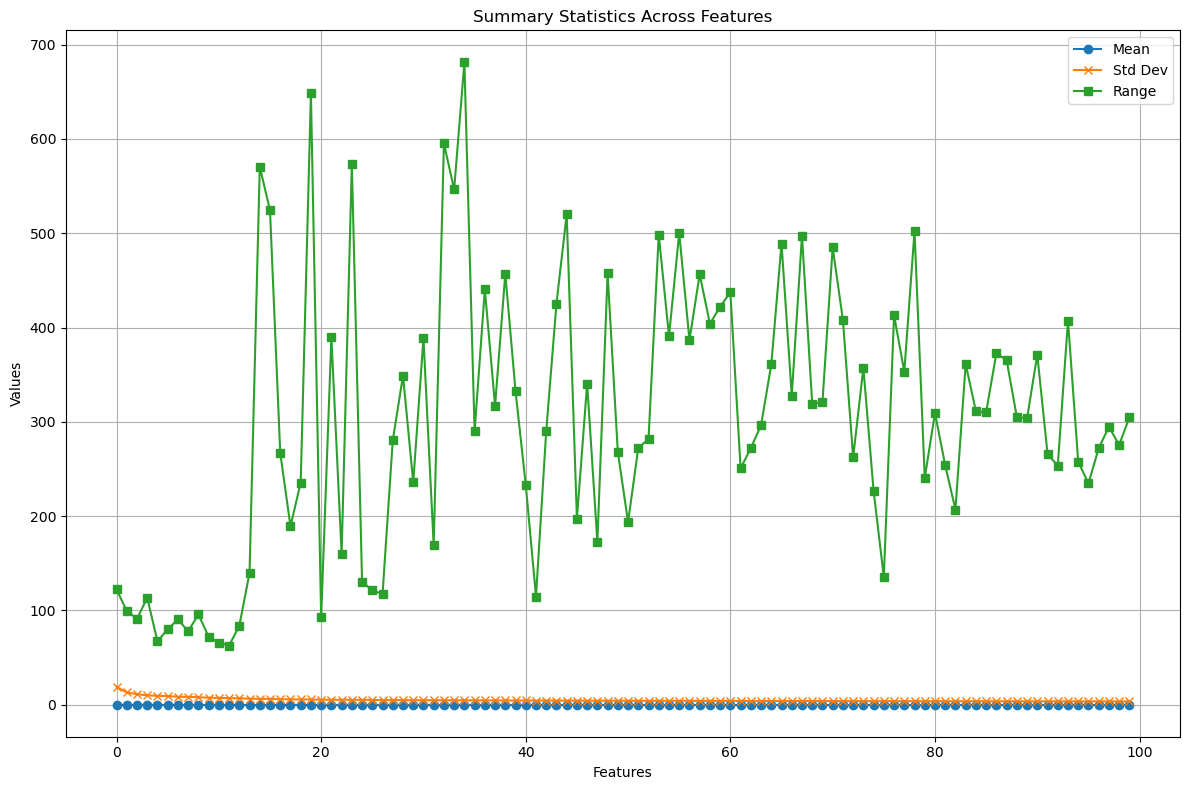

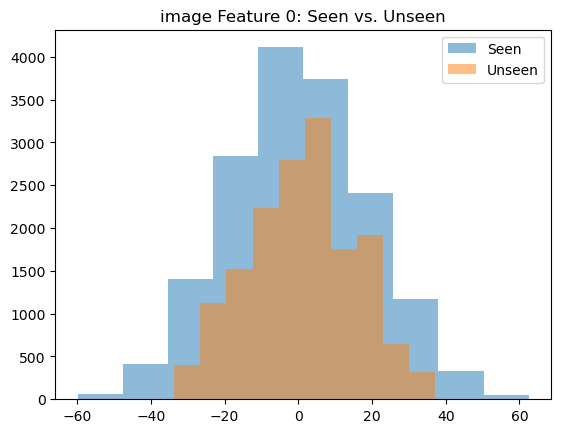

In [7]:
#Analysing image seen dataset 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Convert tensors to Pandas DataFrames
image_seen_df = pd.DataFrame(image_seen.numpy())  

# Basic statistics for Brain data
#print("Brain Data Statistics:")
#print(brain_seen_df.describe())  # Summary for all features

#Box plotfor summary statistic
# Convert tensor to Pandas DataFrame for better handling
image_seen_df = pd.DataFrame(image_seen.numpy())

# Create a box plot
plt.figure(figsize=(12, 8))
image_seen_df.boxplot()
plt.title('Feature Statistics (Box Plot)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=8)  # Rotate feature labels for clarity
plt.tight_layout()
plt.show()

#Error bar chart for mean and std 
# Compute mean and standard deviation
means = image_seen.mean(dim=0).numpy()
stds = image_seen.std(dim=0).numpy()
features = np.arange(len(means))  # Feature indices

# Create error bar chart
plt.figure(figsize=(12, 8))
plt.errorbar(features, means, yerr=stds, fmt='o', ecolor='red', capsize=5, linestyle='None', label='Mean ± Std Dev')
plt.title('Mean and Standard Deviation for Each Feature', fontsize=16)
plt.xlabel('Feature Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Distribution
plt.hist(image_seen[:, 17].numpy(), bins=30)  # Feature 0
plt.title('Distribution of image Feature 0')
plt.show()

#Heatmap Correlation
image_seen_corr = np.corrcoef(image_seen.numpy(), rowvar=False)
sns.heatmap(image_seen_corr, cmap='coolwarm')
plt.title('image Seen Feature Correlation Heatmap')
plt.show()

pca = PCA(n_components=0.95)
image_seen_reduced = pca.fit_transform(image_seen.numpy())
plt.scatter(image_seen_reduced[:, 0], image_seen_reduced[:, 1], c=label_seen.numpy().squeeze())
plt.title('PCA of image Seen Data')
plt.show()

# Plot histograms for a few features (e.g., first 10 features)
image_seen_df.iloc[:, :15].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

# Compute statistics for visualization
feature_means = image_seen_df.mean()
feature_stds = image_seen_df.std()
feature_ranges = image_seen_df.max() - image_seen_df.min()

# Plot statistics
plt.figure(figsize=(12, 8))
plt.plot(feature_means, label='Mean', marker='o')
plt.plot(feature_stds, label='Std Dev', marker='x')
plt.plot(feature_ranges, label='Range', marker='s')
plt.title('Summary Statistics Across Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#Compare the feature distribution of seen and unseen data 
plt.hist(image_seen[:, 0].numpy(), alpha=0.5, label='Seen')
plt.hist(image_unseen[:, 0].numpy(), alpha=0.5, label='Unseen')
plt.legend()
plt.title('image Feature 0: Seen vs. Unseen')
plt.show()

#Check if any features have a constant value (no variance across sample)


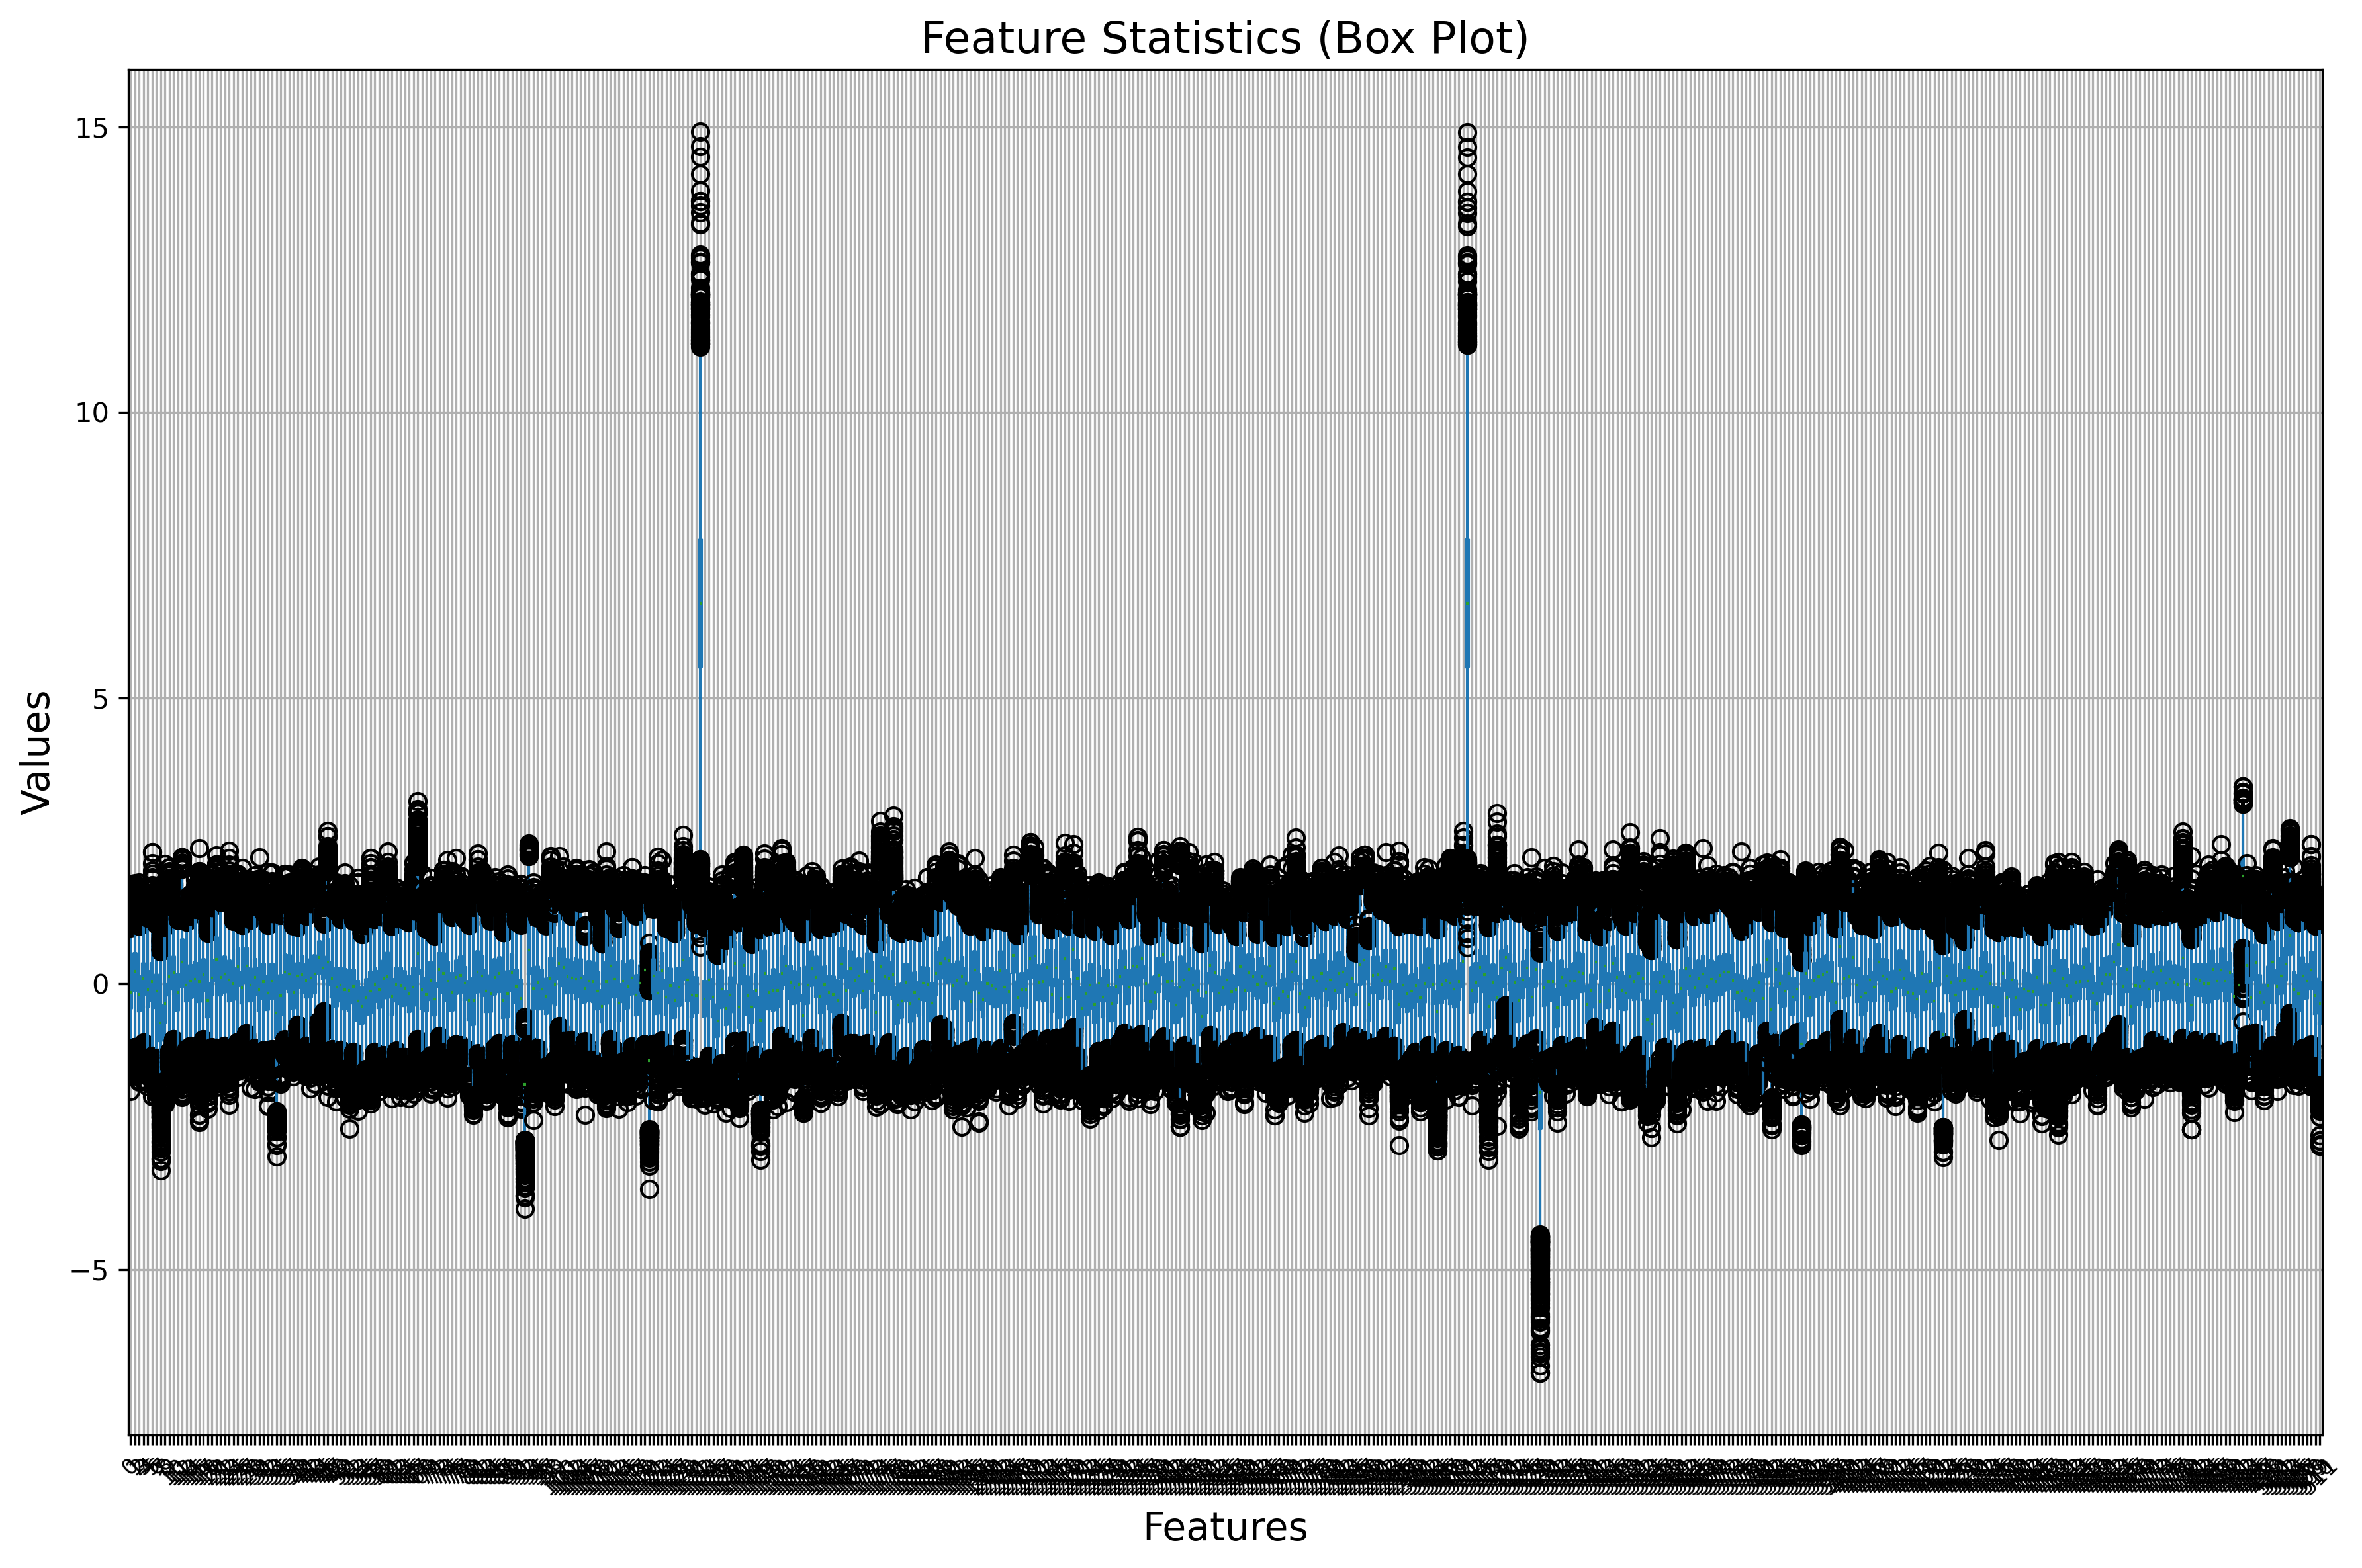

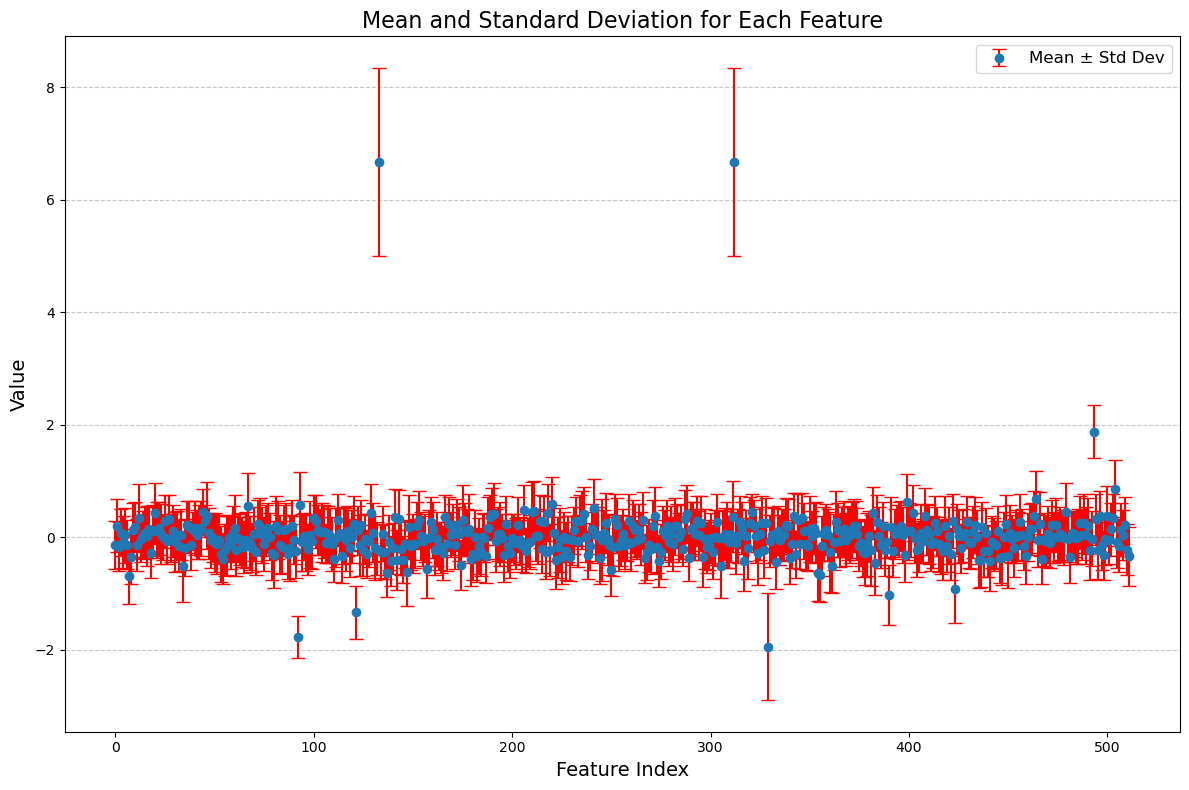

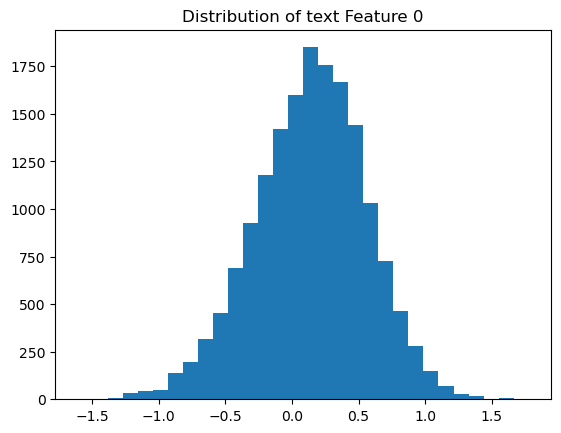

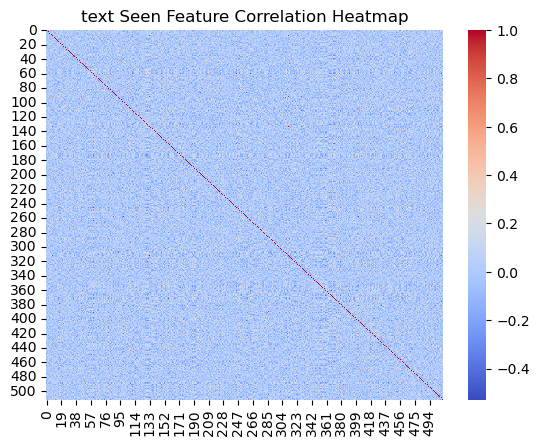

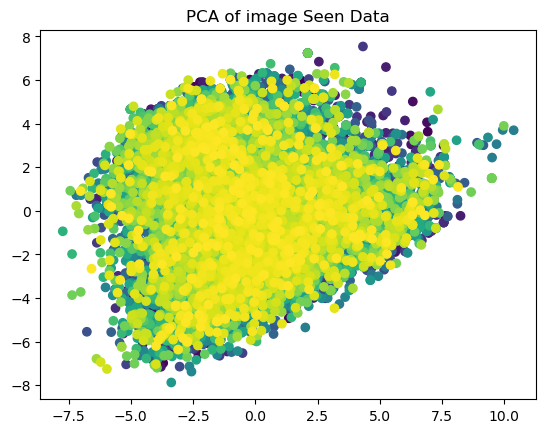

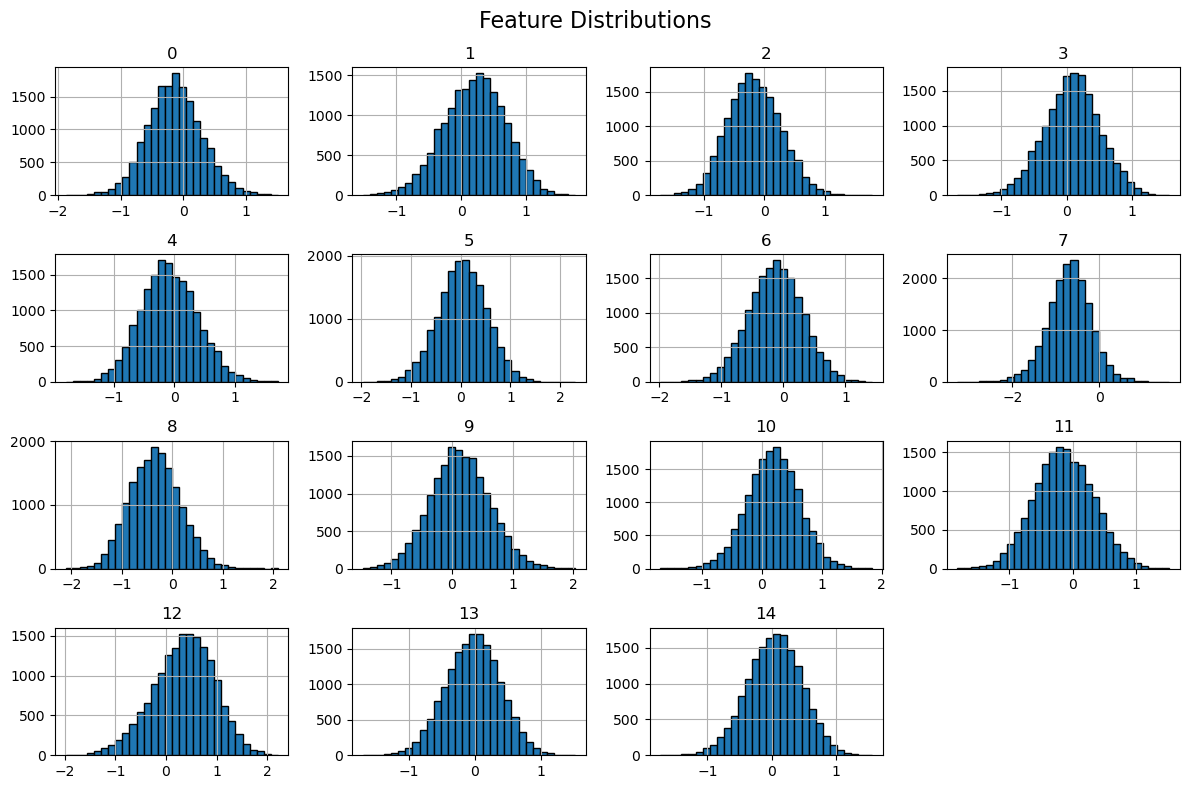

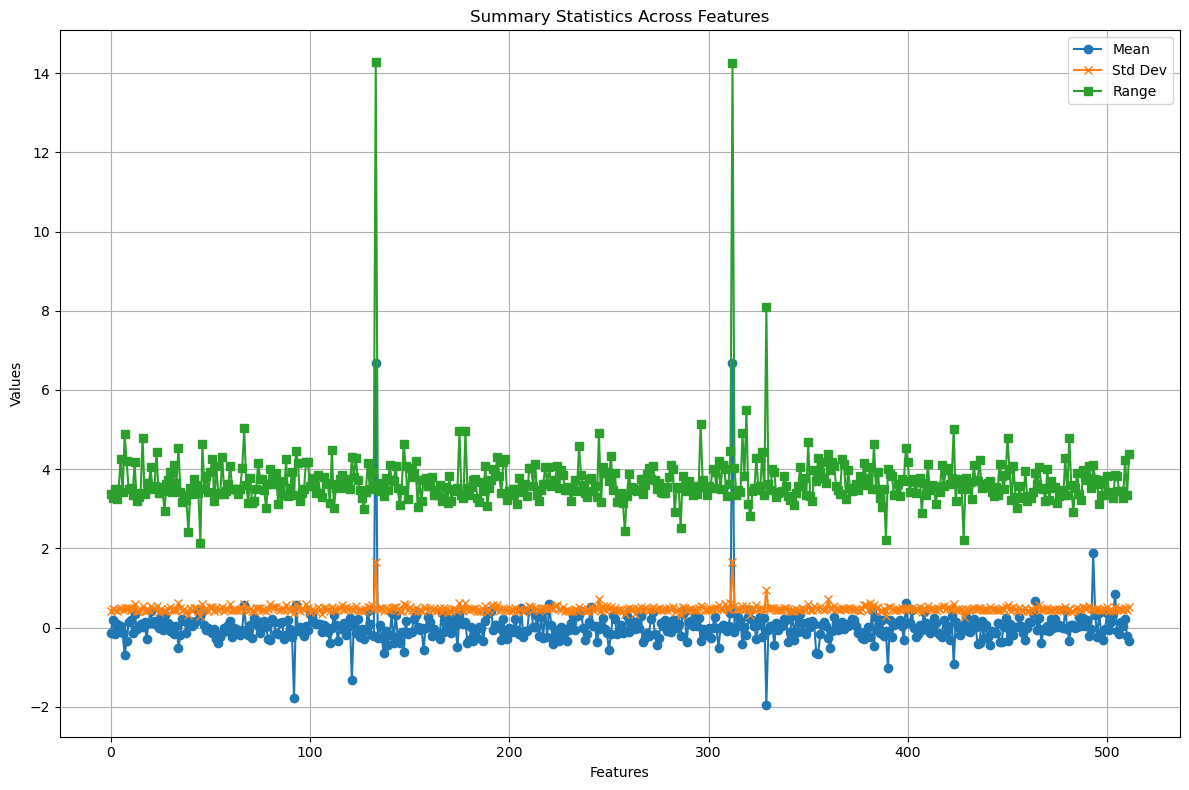

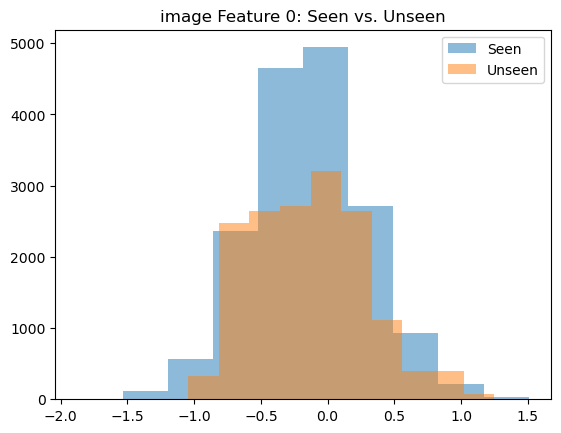

In [8]:
#Analysing text seen dataset 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Convert tensors to Pandas DataFrames
text_seen_df = pd.DataFrame(text_seen.numpy())  

# Basic statistics for Brain data
#print("Brain Data Statistics:")
#print(brain_seen_df.describe())  # Summary for all features

#Box plotfor summary statistic
# Convert tensor to Pandas DataFrame for better handling
text_seen_df = pd.DataFrame(text_seen.numpy())

# Create a box plot
plt.figure(figsize=(12, 8), dpi=300)
text_seen_df.boxplot()
plt.title('Feature Statistics (Box Plot)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=8)  # Rotate feature labels for clarity
plt.tight_layout()
plt.show()

#Error bar chart for mean and std 
# Compute mean and standard deviation
means = text_seen.mean(dim=0).numpy()
stds = text_seen.std(dim=0).numpy()
features = np.arange(len(means))  # Feature indices

# Create error bar chart
plt.figure(figsize=(12, 8))
plt.errorbar(features, means, yerr=stds, fmt='o', ecolor='red', capsize=5, linestyle='None', label='Mean ± Std Dev')
plt.title('Mean and Standard Deviation for Each Feature', fontsize=16)
plt.xlabel('Feature Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Distribution
plt.hist(text_seen[:, 17].numpy(), bins=30)  # Feature 0
plt.title('Distribution of text Feature 0')
plt.show()

#Heatmap Correlation
text_seen_corr = np.corrcoef(text_seen.numpy(), rowvar=False)
sns.heatmap(text_seen_corr, cmap='coolwarm')
plt.title('text Seen Feature Correlation Heatmap')
plt.show()

pca = PCA(n_components=0.95)
text_seen_reduced = pca.fit_transform(text_seen.numpy())
plt.scatter(text_seen_reduced[:, 0], text_seen_reduced[:, 1], c=label_seen.numpy().squeeze())
plt.title('PCA of image Seen Data')
plt.show()

# Plot histograms for a few features (e.g., first 10 features)
text_seen_df.iloc[:, :15].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

# Compute statistics for visualization
feature_means = text_seen_df.mean()
feature_stds = text_seen_df.std()
feature_ranges = text_seen_df.max() - text_seen_df.min()

# Plot statistics
plt.figure(figsize=(12, 8))
plt.plot(feature_means, label='Mean', marker='o')
plt.plot(feature_stds, label='Std Dev', marker='x')
plt.plot(feature_ranges, label='Range', marker='s')
plt.title('Summary Statistics Across Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#Compare the feature distribution of seen and unseen data 
plt.hist(text_seen[:, 0].numpy(), alpha=0.5, label='Seen')
plt.hist(text_unseen[:, 0].numpy(), alpha=0.5, label='Unseen')
plt.legend()
plt.title('image Feature 0: Seen vs. Unseen')
plt.show()


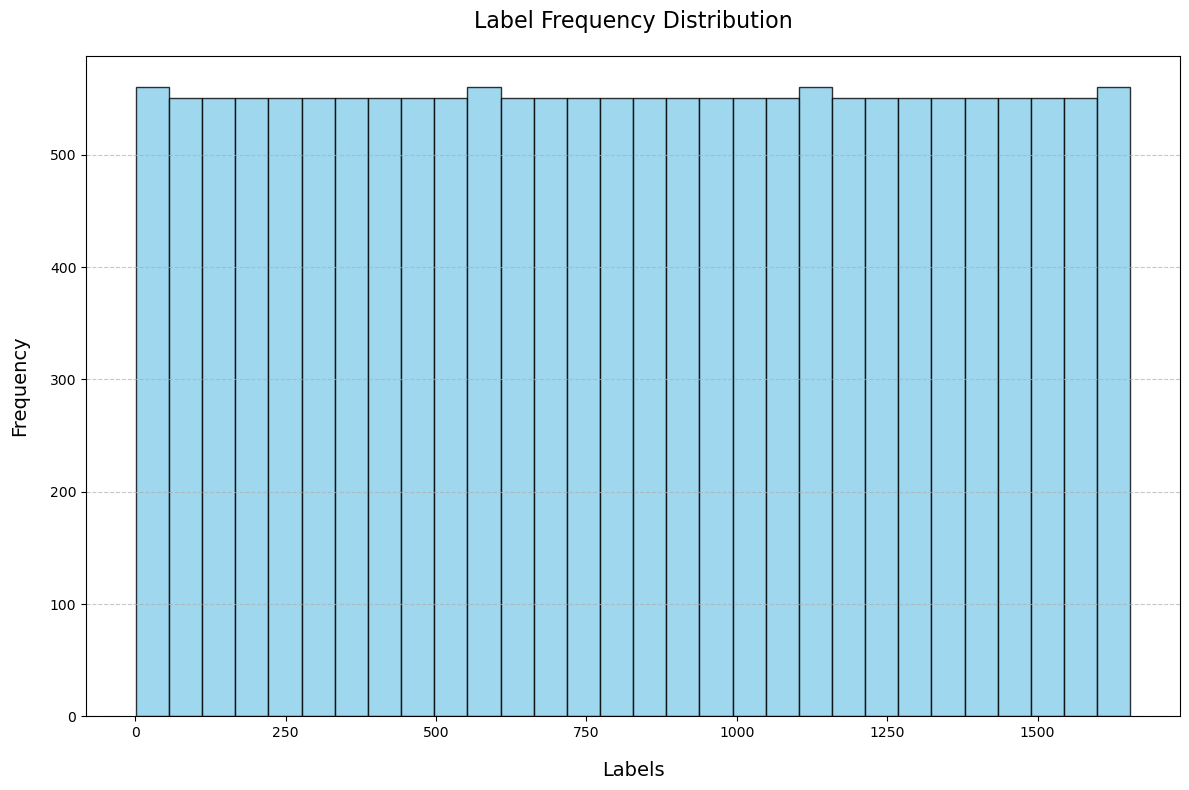

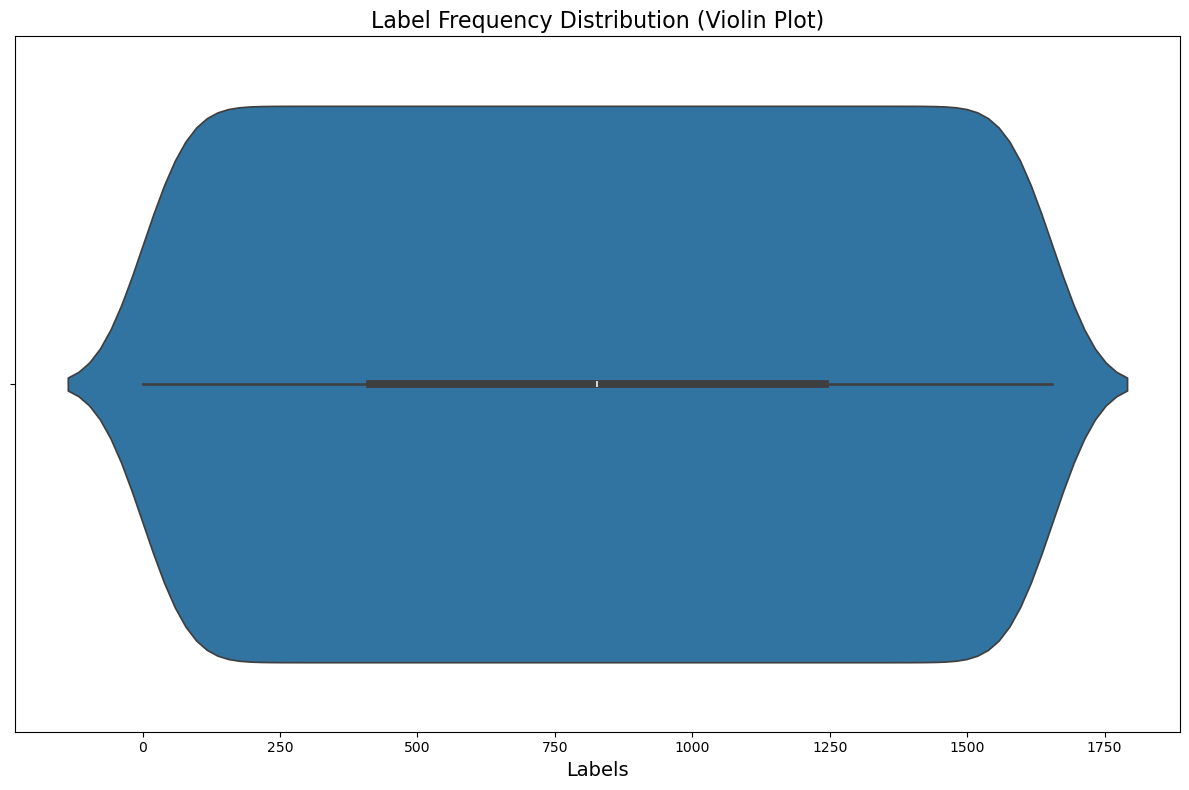

In [9]:
#Analysing labels 
import matplotlib.pyplot as plt

#Histogram
plt.figure(figsize=(12, 8))
plt.hist(label_seen.numpy(), bins=30, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Label Frequency Distribution', fontsize=16, pad=20)
plt.xlabel('Labels', fontsize=14, labelpad=15)
plt.ylabel('Frequency', fontsize=14, labelpad=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### flat bars at the same height, indicates a balanced distribution of classes.

#violin plot or box plot 
import seaborn as sns

# Convert to Pandas DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame({'Label': label_seen.squeeze().numpy()})

# Violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x=df['Label'])
plt.title('Label Frequency Distribution (Violin Plot)', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.tight_layout()
plt.show()

### there is no variation in class frequencies, and the dataset is completely balanced.

### The distribution is entirely uniform, and there are no classes with disproportionately high or low frequencies.

tensor([[ 1.0000e+00,  7.6525e-01,  5.2840e-01,  ...,  3.4776e-03,
         -9.3113e-03,  5.1050e-03],
        [ 7.6525e-01,  1.0000e+00,  7.7393e-01,  ..., -1.0349e-02,
         -8.0452e-03,  1.3003e-02],
        [ 5.2840e-01,  7.7393e-01,  1.0000e+00,  ..., -1.8930e-02,
         -1.2558e-02,  2.2548e-02],
        ...,
        [ 3.4776e-03, -1.0349e-02, -1.8930e-02,  ...,  1.0000e+00,
          9.0853e-08,  1.3337e-07],
        [-9.3113e-03, -8.0452e-03, -1.2558e-02,  ...,  9.0853e-08,
          1.0000e+00,  5.6560e-08],
        [ 5.1050e-03,  1.3003e-02,  2.2548e-02,  ...,  1.3337e-07,
          5.6560e-08,  1.0000e+00]], dtype=torch.float64)
tensor([[ 1.0000,  0.7653,  0.5284,  ..., -0.0022, -0.0085,  0.0023],
        [ 0.7653,  1.0000,  0.7739,  ..., -0.0044,  0.0083, -0.0028],
        [ 0.5284,  0.7739,  1.0000,  ..., -0.0098,  0.0049, -0.0038],
        ...,
        [-0.0022, -0.0044, -0.0098,  ...,  1.0000, -0.0196,  0.0708],
        [-0.0085,  0.0083,  0.0049,  ..., -0.0196,  1.

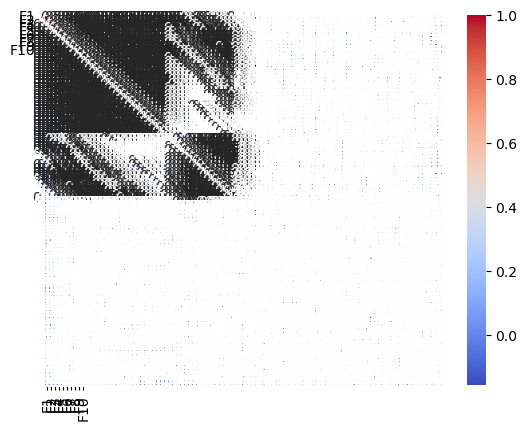

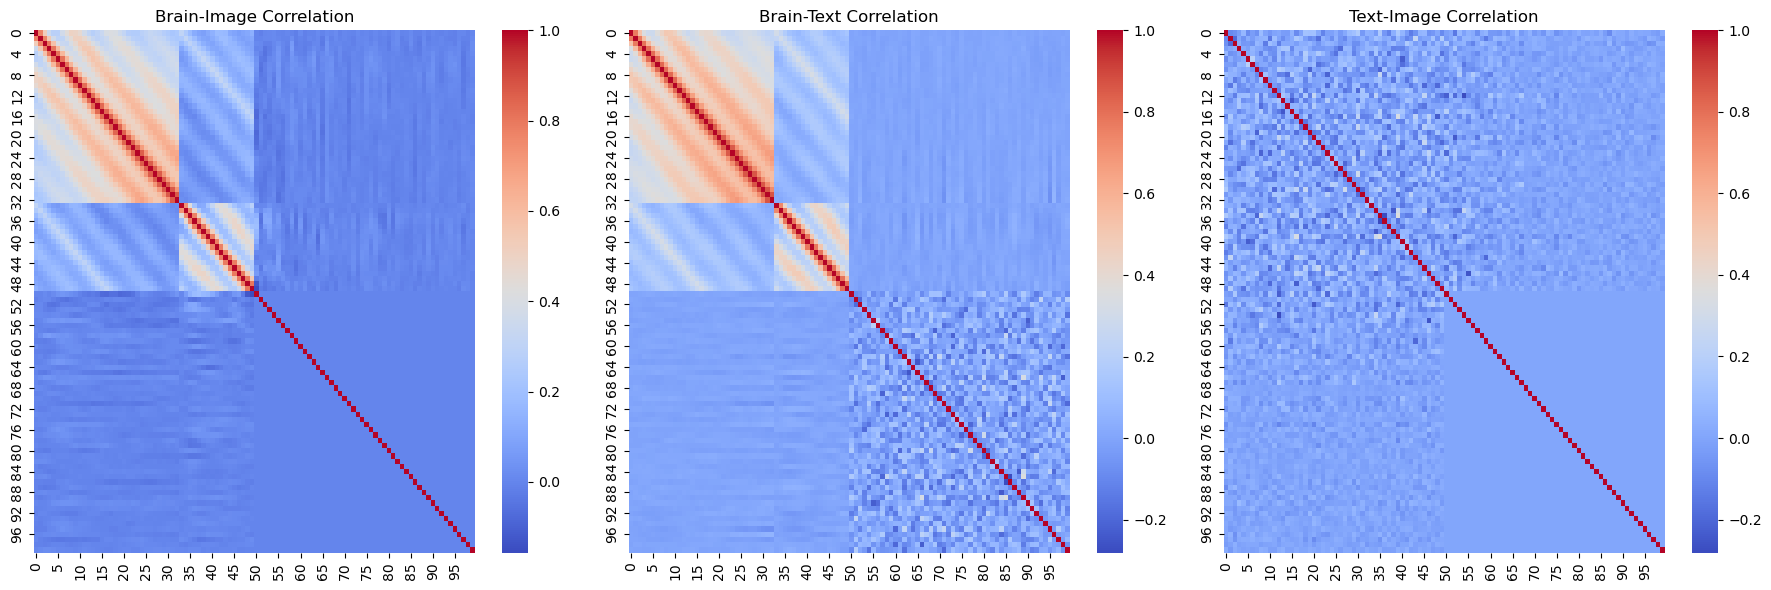

In [10]:
#Multimodal reltionships 
#Helps with model design 
import matplotlib.pyplot as plt
import seaborn as sns
import torch

brain_image_corr = torch.corrcoef(torch.cat((brain_seen[:, :50], image_seen[:, :50]), dim=1).T)
print(brain_image_corr)
brain_text_corr = torch.corrcoef(torch.cat((brain_seen[:, :50], text_seen[:, :50]), dim=1).T)
print(brain_text_corr)
text_image_corr = torch.corrcoef(torch.cat((text_seen[:, :50], image_seen[:, :50]), dim=1).T)
print(text_image_corr)
all_corr = torch.corrcoef(torch.cat((brain_seen[:, :50], text_seen[:, :50], image_seen[:, :50]), dim=1).T)


# Heatmap for relationships 
brain_image_corr = brain_image_corr.numpy()  # Convert PyTorch tensor to NumPy array
brain_text_corr = brain_text_corr.numpy()
text_image_corr = text_image_corr.numpy()

def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.xlabel("Features")
    plt.ylabel("Features")
    plt.show()

feature_labels = [f"F{i+1}" for i in range(10)]  # Replace with actual feature names
sns.heatmap(brain_image_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            xticklabels=feature_labels, yticklabels=feature_labels)

#To see all the heatmaps together
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(brain_image_corr, annot=False, fmt=".2f", cmap="coolwarm", ax=axes[0])
axes[0].set_title("Brain-Image Correlation")

sns.heatmap(brain_text_corr, annot=False, fmt=".2f", cmap="coolwarm", ax=axes[1])
axes[1].set_title("Brain-Text Correlation")

sns.heatmap(text_image_corr, annot=False, fmt=".2f", cmap="coolwarm", ax=axes[2])
axes[2].set_title("Text-Image Correlation")

plt.tight_layout()
plt.show()


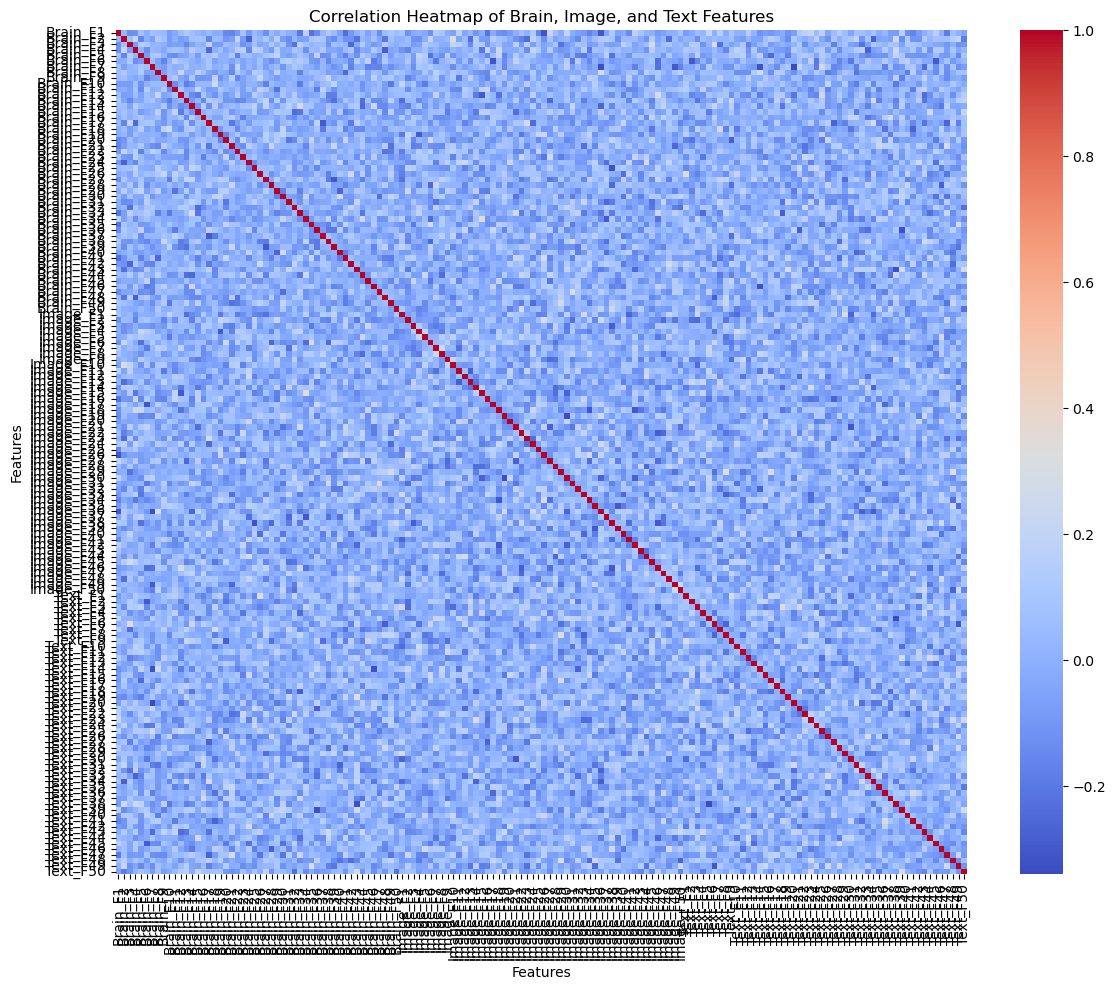

In [11]:
#Multimodal relationship
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example datasets: Replace these with your actual data tensors
# Assume brain, image, and text are PyTorch tensors of shape (samples, features)
brain = torch.randn(100, 50)  # 100 samples, 50 features
image = torch.randn(100, 50)
text = torch.randn(100, 50)

# Concatenate all datasets along the feature axis
concatenated_data = torch.cat((brain, image, text), dim=1)

# Compute the correlation matrix
correlation_matrix = torch.corrcoef(concatenated_data.T).numpy()  # Convert to NumPy for visualization

# Create feature labels
brain_labels = [f"Brain_F{i+1}" for i in range(brain.shape[1])]
image_labels = [f"Image_F{i+1}" for i in range(image.shape[1])]
text_labels = [f"Text_F{i+1}" for i in range(text.shape[1])]
feature_labels = brain_labels + image_labels + text_labels

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", xticklabels=feature_labels, yticklabels=feature_labels)
plt.title("Correlation Heatmap of Brain, Image, and Text Features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


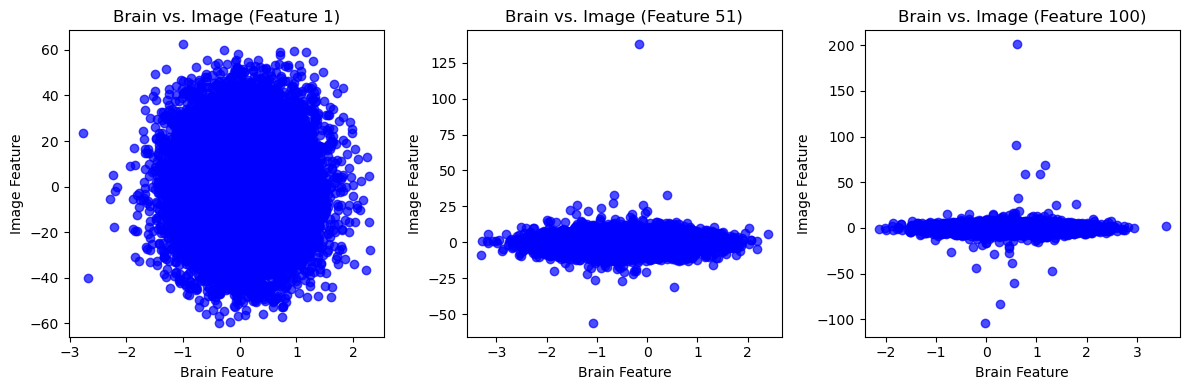

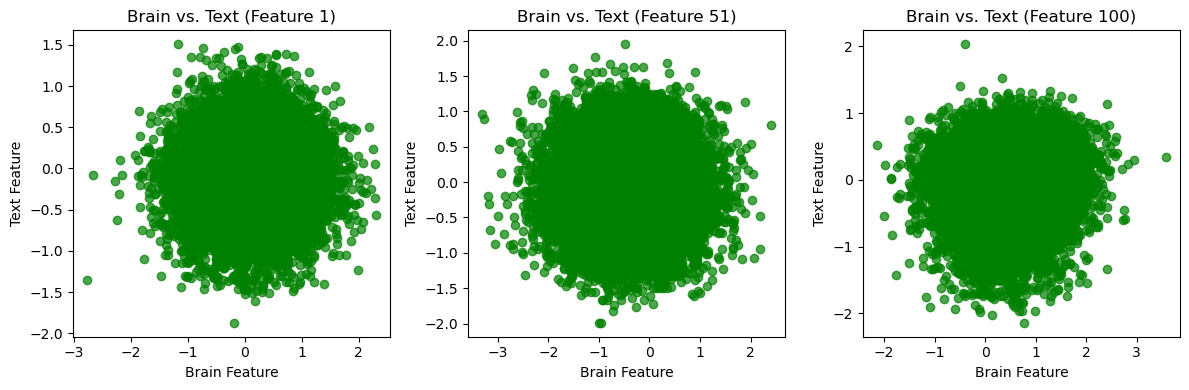

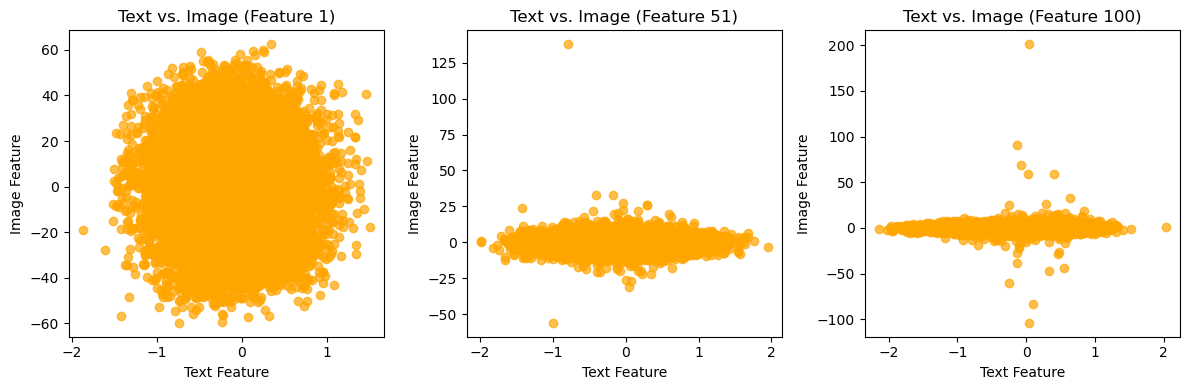

In [12]:
#Multimodal relationship 
import matplotlib.pyplot as plt

# Example feature pairs for scatter plots
# Select a few feature indices (e.g., 0, 1, 2) for visualization
feature_indices = [0, 50, 99]

# Brain-Image Scatter Plots
plt.figure(figsize=(12, 4))
for i, idx in enumerate(feature_indices):
    plt.subplot(1, 3, i+1)
    plt.scatter(brain_seen[:, idx], image_seen[:, idx], alpha=0.7, c='blue')
    plt.title(f"Brain vs. Image (Feature {idx+1})")
    plt.xlabel("Brain Feature")
    plt.ylabel("Image Feature")
plt.tight_layout()
plt.show()

# Brain-Text Scatter Plots
plt.figure(figsize=(12, 4))
for i, idx in enumerate(feature_indices):
    plt.subplot(1, 3, i+1)
    plt.scatter(brain_seen[:, idx], text_seen[:, idx], alpha=0.7, c='green')
    plt.title(f"Brain vs. Text (Feature {idx+1})")
    plt.xlabel("Brain Feature")
    plt.ylabel("Text Feature")
plt.tight_layout()
plt.show()

# Text-Image Scatter Plots
plt.figure(figsize=(12, 4))
for i, idx in enumerate(feature_indices):
    plt.subplot(1, 3, i+1)
    plt.scatter(text_seen[:, idx], image_seen[:, idx], alpha=0.7, c='orange')
    plt.title(f"Text vs. Image (Feature {idx+1})")
    plt.xlabel("Text Feature")
    plt.ylabel("Image Feature")
plt.tight_layout()
plt.show()


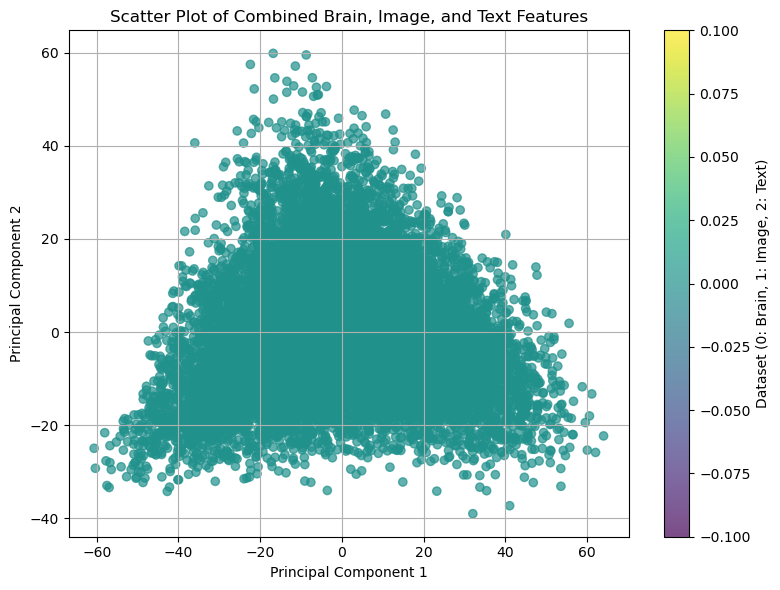

In [13]:
#Multimodal relationship
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming brain_seen, image_seen, text_seen are numpy arrays
# Concatenate features from all datasets
combined_features = np.concatenate([brain_seen, image_seen, text_seen], axis=1)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
combined_features_2D = pca.fit_transform(combined_features)

# Create labels for visualization
# All features are concatenated, so the labels must match the rows in combined_features
num_samples = brain_seen.shape[0]  # Assuming all datasets have the same number of samples
labels = np.concatenate([
    np.full(num_samples, 0),  # Label 0 for Brain
    np.full(num_samples, 1),  # Label 1 for Image
    np.full(num_samples, 2)   # Label 2 for Text
])

# Scatter plot for all features combined
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    combined_features_2D[:, 0], combined_features_2D[:, 1], c=labels[:combined_features_2D.shape[0]], cmap="viridis", alpha=0.7
)
plt.colorbar(scatter, label="Dataset (0: Brain, 1: Image, 2: Text)")
plt.title("Scatter Plot of Combined Brain, Image, and Text Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()



In [14]:
###Test Dataset Summary
import pandas as pd

# Convert tensors to Pandas DataFrames
brain_unseen_df = pd.DataFrame(brain_unseen.numpy())  # Brain data
image_unseen_df = pd.DataFrame(image_unseen.numpy())  # Image data
text_unseen_df = pd.DataFrame(text_unseen.numpy())    # Text data

# Convert labels to Pandas Series
label_unseen_df = pd.Series(label_unseen.squeeze().numpy(), name="Labels")

# Basic statistics for Brain data
print("Brain Data Statistics:")
print(brain_unseen_df.describe())  # Summary for all features

# Basic statistics for Image data
print("\nImage Data Statistics:")
print(image_unseen_df.describe())

# Basic statistics for Text data
print("\nText Data Statistics:")
print(text_unseen_df.describe())


Brain Data Statistics:
                0             1             2             3             4    \
count  16000.000000  16000.000000  16000.000000  16000.000000  16000.000000   
mean       0.091986      0.076949      0.019530     -0.051677     -0.089775   
std        1.153776      1.160749      1.185632      1.211734      1.227983   
min      -11.856574     -9.381197     -8.194930     -6.841601    -10.255641   
25%       -0.650197     -0.676969     -0.744977     -0.825708     -0.866124   
50%        0.095901      0.075520      0.022469     -0.044477     -0.090700   
75%        0.824845      0.825316      0.781160      0.724208      0.693630   
max       12.443961     12.761315     11.354595     12.774470     11.979368   

                5             6             7             8             9    \
count  16000.000000  16000.000000  16000.000000  16000.000000  16000.000000   
mean      -0.131000     -0.159548     -0.145356     -0.086584     -0.033189   
std        1.252324      1.2

In [15]:
#Missing values 
import pandas as pd
# Convert tensors to Pandas DataFrames
brain_unseen_df = pd.DataFrame(brain_unseen.numpy())  
image_unseen_df = pd.DataFrame(image_unseen.numpy()) 
text_unseen_df = pd.DataFrame(text_unseen.numpy())  
label_unseen_df = pd.Series(label_unseen.squeeze().numpy(), name="Labels")
brain_seen_df = pd.DataFrame(brain_seen.numpy()) 
image_seen_df = pd.DataFrame(image_seen.numpy())  
text_seen_df = pd.DataFrame(text_seen.numpy()) 
label_seen_df = pd.Series(label_seen.squeeze().numpy(), name="Labels")
# Check for missing values in Brain data

print("Brain Unseen Missing Values:")
print(brain_unseen_df.isnull().sum())

# Check for missing values in Image data
print("\nImage Unseen Missing Values:")
print(image_unseen_df.isnull().sum())

# Check for missing values in Text data
print("\nText Unseen Missing Values:")
print(text_unseen_df.isnull().sum())

# Check for missing values in Labels
print("\nLabel Unseen Missing Values:")
print(label_unseen_df.isnull().sum())

# Check for missing values in Brain data
print("Brain Seen Missing Values:")
print(brain_seen_df.isnull().sum())

# Check for missing values in Image data
print("\nImage Seen Missing Values:")
print(image_seen_df.isnull().sum())

# Check for missing values in Text data
print("\nText Seen Missing Values:")
print(text_seen_df.isnull().sum())

# Check for missing values in Labels
print("\nLabel Seen Missing Values:")
print(label_seen_df.isnull().sum())



Brain Unseen Missing Values:
0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

Image Unseen Missing Values:
0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int64

Text Unseen Missing Values:
0      0
1      0
2      0
3      0
4      0
      ..
507    0
508    0
509    0
510    0
511    0
Length: 512, dtype: int64

Label Unseen Missing Values:
0
Brain Seen Missing Values:
0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

Image Seen Missing Values:
0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int64

Text Seen Missing Values:
0      0
1      0
2      0
3      0
4      0
      ..
507    0
508    0
509    0
510    0
511    0
Length: 512, dtype: int64

Label Seen Missing Values:
0


In [16]:
# To check the whole dataframe for missing value 
# Same method applied for all datasets (seen & unseen) 

# Set Pandas display options to see the full DataFrame
import pandas as pd

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Check missing values for the Brain data
print("Brain Data Missing Values:")
print(text_unseen_df.isnull().sum())

# Reset the display options (optional)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# Save missing value summary to a file
text_unseen_df.isnull().sum().to_csv('brain_missing_values.csv', index=True)
print("Missing values have been saved to 'brain_missing_values.csv'")

# Show only columns with missing values
missing_columns = text_unseen_df.isnull().sum()[text_unseen_df.isnull().sum() > 0]
print("Columns with missing values:")
print(missing_columns)


Brain Data Missing Values:
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
1